In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

# load data 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# one hot encoding for labels
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

num_classes = Y_test.shape[1]
num_classes

Using TensorFlow backend.


10

In [2]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)
X_train.shape

(50000, 32, 32, 3)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD

# Create the model

model = Sequential()
model.add(Cropping2D(cropping=((5, 0), (0, 0)), input_shape=(32, 32, 3)))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu' ))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 27, 32, 3)     0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 27, 32, 32)    896         cropping2d_1[0][0]               
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 27, 32, 32)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 27, 32, 32)    9248        dropout_3[0][0]                  
___________________________________________________________________________________________

[<tf.Tensor 'cropping2d_input_1:0' shape=(?, 32, 32, 3) dtype=float32>]
(10, 27, 32, 3)


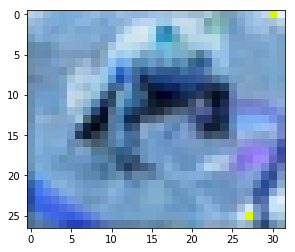

In [32]:
from keras import backend as K

import matplotlib.pyplot as plt
%matplotlib inline 

fun = K.function([model.layers[0].input], [model.layers[0].output])

print(fun.inputs)
# mind that doesnt say a tensor, but a damn list of tensor!!
# http://stackoverflow.com/questions/42045092/does-k-function-method-of-keras-with-tensorflow-backend-work-with-network-layers

aa = X_train[0:10]

image = fun([aa])[0]

print(image.shape)
plt.imshow(image[0])

In [53]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    samples_per_epoch=len(X_train),
                    nb_epoch=epochs)

Epoch 1/25


   32/50000 [..............................] - ETA: 2760s - loss: 2.6833 - acc: 0.0625

   64/50000 [..............................] - ETA: 1467s - loss: 2.5778 - acc: 0.0781

   96/50000 [..............................] - ETA: 1035s - loss: 2.5363 - acc: 0.0521

  128/50000 [..............................] - ETA: 821s - loss: 2.5158 - acc: 0.0625 

  160/50000 [..............................] - ETA: 691s - loss: 2.4480 - acc: 0.1062

  192/50000 [..............................] - ETA: 604s - loss: 2.4095 - acc: 0.1146

  224/50000 [..............................] - ETA: 542s - loss: 2.4218 - acc: 0.1071

  256/50000 [..............................] - ETA: 495s - loss: 2.4468 - acc: 0.1055

  288/50000 [..............................] - ETA: 459s - loss: 2.4355 - acc: 0.1181

  320/50000 [..............................] - ETA: 430s - loss: 2.4249 - acc: 0.1156

  352/50000 [..............................] - ETA: 406s - loss: 2.4138 - acc: 0.1165

  384/50000 [..............................] - ETA: 386s - loss: 2.4007 - acc: 0.1172

  416/50000 [..............................] - ETA: 369s - loss: 2.3933 - acc: 0.1154

  448/50000 [..............................] - ETA: 354s - loss: 2.3896 - acc: 0.1161

  480/50000 [..............................] - ETA: 341s - loss: 2.3822 - acc: 0.1167

  512/50000 [..............................] - ETA: 330s - loss: 2.3789 - acc: 0.1211

  544/50000 [..............................] - ETA: 319s - loss: 2.3702 - acc: 0.1213

  576/50000 [..............................] - ETA: 310s - loss: 2.3574 - acc: 0.1233

  608/50000 [..............................] - ETA: 302s - loss: 2.3468 - acc: 0.1299

  640/50000 [..............................] - ETA: 295s - loss: 2.3403 - acc: 0.1328

  672/50000 [..............................] - ETA: 288s - loss: 2.3330 - acc: 0.1339



  704/50000 [..............................] - ETA: 282s - loss: 2.3271 - acc: 0.1321

  736/50000 [..............................] - ETA: 276s - loss: 2.3192 - acc: 0.1345

  768/50000 [..............................] - ETA: 272s - loss: 2.3128 - acc: 0.1380

  800/50000 [..............................] - ETA: 268s - loss: 2.3077 - acc: 0.1412

  832/50000 [..............................] - ETA: 264s - loss: 2.3066 - acc: 0.1394

  864/50000 [..............................] - ETA: 260s - loss: 2.2995 - acc: 0.1424

  896/50000 [..............................] - ETA: 257s - loss: 2.2979 - acc: 0.1451

  928/50000 [..............................] - ETA: 254s - loss: 2.2950 - acc: 0.1455

  960/50000 [..............................] - ETA: 251s - loss: 2.2957 - acc: 0.1469

  992/50000 [..............................] - ETA: 249s - loss: 2.2885 - acc: 0.1492

 1024/50000 [..............................] - ETA: 246s - loss: 2.2832 - acc: 0.1523

 1056/50000 [..............................] - ETA: 244s - loss: 2.2843 - acc: 0.1534

 1088/50000 [..............................] - ETA: 241s - loss: 2.2827 - acc: 0.1526

 1120/50000 [..............................] - ETA: 239s - loss: 2.2786 - acc: 0.1536

 1152/50000 [..............................] - ETA: 237s - loss: 2.2740 - acc: 0.1554

 1184/50000 [..............................] - ETA: 235s - loss: 2.2693 - acc: 0.1588

 1216/50000 [..............................] - ETA: 233s - loss: 2.2649 - acc: 0.1620

 1248/50000 [..............................] - ETA: 231s - loss: 2.2660 - acc: 0.1595

 1280/50000 [..............................] - ETA: 229s - loss: 2.2664 - acc: 0.1648

 1312/50000 [..............................] - ETA: 227s - loss: 2.2593 - acc: 0.1654

 1344/50000 [..............................] - ETA: 226s - loss: 2.2569 - acc: 0.1659

 1376/50000 [..............................] - ETA: 224s - loss: 2.2540 - acc: 0.1657

 1408/50000 [..............................] - ETA: 223s - loss: 2.2537 - acc: 0.1676

 1440/50000 [..............................] - ETA: 221s - loss: 2.2476 - acc: 0.1688

 1472/50000 [..............................] - ETA: 220s - loss: 2.2425 - acc: 0.1692

 1504/50000 [..............................] - ETA: 219s - loss: 2.2417 - acc: 0.1722

 1536/50000 [..............................] - ETA: 218s - loss: 2.2354 - acc: 0.1719

 1568/50000 [..............................] - ETA: 217s - loss: 2.2314 - acc: 0.1735

 1600/50000 [..............................] - ETA: 215s - loss: 2.2302 - acc: 0.1731

 1632/50000 [..............................] - ETA: 214s - loss: 2.2279 - acc: 0.1746

 1664/50000 [..............................] - ETA: 213s - loss: 2.2240 - acc: 0.1749

 1696/50000 [>.............................] - ETA: 212s - loss: 2.2194 - acc: 0.1787

 1728/50000 [>.............................] - ETA: 211s - loss: 2.2170 - acc: 0.1788

 1760/50000 [>.............................] - ETA: 210s - loss: 2.2155 - acc: 0.1778

 1792/50000 [>.............................] - ETA: 209s - loss: 2.2142 - acc: 0.1775

 1824/50000 [>.............................] - ETA: 208s - loss: 2.2090 - acc: 0.1798

 1856/50000 [>.............................] - ETA: 207s - loss: 2.2061 - acc: 0.1800

 1888/50000 [>.............................] - ETA: 206s - loss: 2.2010 - acc: 0.1817

 1920/50000 [>.............................] - ETA: 206s - loss: 2.1956 - acc: 0.1849

 1952/50000 [>.............................] - ETA: 205s - loss: 2.2000 - acc: 0.1855

 1984/50000 [>.............................] - ETA: 204s - loss: 2.1989 - acc: 0.1870

 2016/50000 [>.............................] - ETA: 203s - loss: 2.1959 - acc: 0.1885

 2048/50000 [>.............................] - ETA: 202s - loss: 2.1937 - acc: 0.1880

 2080/50000 [>.............................] - ETA: 202s - loss: 2.1883 - acc: 0.1894

 2112/50000 [>.............................] - ETA: 201s - loss: 2.1853 - acc: 0.1908

 2144/50000 [>.............................] - ETA: 200s - loss: 2.1811 - acc: 0.1926

 2176/50000 [>.............................] - ETA: 199s - loss: 2.1831 - acc: 0.1926

 2208/50000 [>.............................] - ETA: 199s - loss: 2.1806 - acc: 0.1934

 2240/50000 [>.............................] - ETA: 198s - loss: 2.1792 - acc: 0.1938

 2272/50000 [>.............................] - ETA: 198s - loss: 2.1760 - acc: 0.1941

 2304/50000 [>.............................] - ETA: 197s - loss: 2.1756 - acc: 0.1953

 2336/50000 [>.............................] - ETA: 197s - loss: 2.1749 - acc: 0.1961

 2368/50000 [>.............................] - ETA: 196s - loss: 2.1713 - acc: 0.1976

 2400/50000 [>.............................] - ETA: 196s - loss: 2.1692 - acc: 0.2000

 2432/50000 [>.............................] - ETA: 195s - loss: 2.1665 - acc: 0.2011

 2464/50000 [>.............................] - ETA: 195s - loss: 2.1669 - acc: 0.2013

 2496/50000 [>.............................] - ETA: 194s - loss: 2.1693 - acc: 0.2003

 2528/50000 [>.............................] - ETA: 194s - loss: 2.1684 - acc: 0.2017

 2560/50000 [>.............................] - ETA: 193s - loss: 2.1637 - acc: 0.2035

 2592/50000 [>.............................] - ETA: 193s - loss: 2.1632 - acc: 0.2041

 2624/50000 [>.............................] - ETA: 192s - loss: 2.1611 - acc: 0.2054

 2656/50000 [>.............................] - ETA: 192s - loss: 2.1602 - acc: 0.2075

 2688/50000 [>.............................] - ETA: 191s - loss: 2.1601 - acc: 0.2076

 2720/50000 [>.............................] - ETA: 191s - loss: 2.1600 - acc: 0.2066

 2752/50000 [>.............................] - ETA: 190s - loss: 2.1584 - acc: 0.2071

 2784/50000 [>.............................] - ETA: 190s - loss: 2.1576 - acc: 0.2083

 2816/50000 [>.............................] - ETA: 189s - loss: 2.1548 - acc: 0.2106

 2848/50000 [>.............................] - ETA: 189s - loss: 2.1524 - acc: 0.2128

 2880/50000 [>.............................] - ETA: 188s - loss: 2.1525 - acc: 0.2128

 2912/50000 [>.............................] - ETA: 188s - loss: 2.1499 - acc: 0.2122

 2944/50000 [>.............................] - ETA: 188s - loss: 2.1502 - acc: 0.2130

 2976/50000 [>.............................] - ETA: 187s - loss: 2.1475 - acc: 0.2147

 3008/50000 [>.............................] - ETA: 187s - loss: 2.1481 - acc: 0.2158

 3040/50000 [>.............................] - ETA: 186s - loss: 2.1472 - acc: 0.2168

 3072/50000 [>.............................] - ETA: 186s - loss: 2.1457 - acc: 0.2174

 3104/50000 [>.............................] - ETA: 185s - loss: 2.1450 - acc: 0.2178

 3136/50000 [>.............................] - ETA: 185s - loss: 2.1439 - acc: 0.2178

 3168/50000 [>.............................] - ETA: 185s - loss: 2.1435 - acc: 0.2178

 3200/50000 [>.............................] - ETA: 184s - loss: 2.1418 - acc: 0.2181

 3232/50000 [>.............................] - ETA: 184s - loss: 2.1412 - acc: 0.2175

 3264/50000 [>.............................] - ETA: 184s - loss: 2.1391 - acc: 0.2184

 3296/50000 [>.............................] - ETA: 183s - loss: 2.1357 - acc: 0.2191

 3328/50000 [>.............................] - ETA: 183s - loss: 2.1329 - acc: 0.2200

 3360/50000 [=>............................] - ETA: 183s - loss: 2.1322 - acc: 0.2199

 3392/50000 [=>............................] - ETA: 182s - loss: 2.1300 - acc: 0.2202

 3424/50000 [=>............................] - ETA: 182s - loss: 2.1278 - acc: 0.2217

 3456/50000 [=>............................] - ETA: 181s - loss: 2.1236 - acc: 0.2231

 3488/50000 [=>............................] - ETA: 181s - loss: 2.1208 - acc: 0.2248

 3520/50000 [=>............................] - ETA: 181s - loss: 2.1194 - acc: 0.2253

 3552/50000 [=>............................] - ETA: 181s - loss: 2.1194 - acc: 0.2258

 3584/50000 [=>............................] - ETA: 180s - loss: 2.1205 - acc: 0.2266

 3616/50000 [=>............................] - ETA: 180s - loss: 2.1203 - acc: 0.2273

 3648/50000 [=>............................] - ETA: 180s - loss: 2.1200 - acc: 0.2278

 3680/50000 [=>............................] - ETA: 179s - loss: 2.1173 - acc: 0.2293

 3712/50000 [=>............................] - ETA: 179s - loss: 2.1172 - acc: 0.2298

 3744/50000 [=>............................] - ETA: 179s - loss: 2.1150 - acc: 0.2310

 3776/50000 [=>............................] - ETA: 179s - loss: 2.1151 - acc: 0.2309

 3808/50000 [=>............................] - ETA: 179s - loss: 2.1131 - acc: 0.2314

 3840/50000 [=>............................] - ETA: 179s - loss: 2.1113 - acc: 0.2320

 3872/50000 [=>............................] - ETA: 179s - loss: 2.1109 - acc: 0.2322

 3904/50000 [=>............................] - ETA: 179s - loss: 2.1092 - acc: 0.2326

 3936/50000 [=>............................] - ETA: 179s - loss: 2.1079 - acc: 0.2335

 3968/50000 [=>............................] - ETA: 179s - loss: 2.1061 - acc: 0.2336

 4000/50000 [=>............................] - ETA: 179s - loss: 2.1039 - acc: 0.2345

 4032/50000 [=>............................] - ETA: 178s - loss: 2.1035 - acc: 0.2346

 4064/50000 [=>............................] - ETA: 178s - loss: 2.1033 - acc: 0.2335

 4096/50000 [=>............................] - ETA: 178s - loss: 2.1035 - acc: 0.2344

 4128/50000 [=>............................] - ETA: 178s - loss: 2.1049 - acc: 0.2343

 4160/50000 [=>............................] - ETA: 177s - loss: 2.1034 - acc: 0.2346

 4192/50000 [=>............................] - ETA: 177s - loss: 2.1035 - acc: 0.2345

 4224/50000 [=>............................] - ETA: 177s - loss: 2.1058 - acc: 0.2346

 4256/50000 [=>............................] - ETA: 177s - loss: 2.1047 - acc: 0.2347

 4288/50000 [=>............................] - ETA: 177s - loss: 2.1048 - acc: 0.2346

 4320/50000 [=>............................] - ETA: 176s - loss: 2.1054 - acc: 0.2338

 4352/50000 [=>............................] - ETA: 176s - loss: 2.1047 - acc: 0.2337

 4384/50000 [=>............................] - ETA: 176s - loss: 2.1035 - acc: 0.2340

 4416/50000 [=>............................] - ETA: 176s - loss: 2.1022 - acc: 0.2346

 4448/50000 [=>............................] - ETA: 176s - loss: 2.1013 - acc: 0.2340

 4480/50000 [=>............................] - ETA: 176s - loss: 2.1008 - acc: 0.2342

 4512/50000 [=>............................] - ETA: 175s - loss: 2.1001 - acc: 0.2347

 4544/50000 [=>............................] - ETA: 175s - loss: 2.0983 - acc: 0.2355

 4576/50000 [=>............................] - ETA: 175s - loss: 2.0986 - acc: 0.2351

 4608/50000 [=>............................] - ETA: 175s - loss: 2.0962 - acc: 0.2359

 4640/50000 [=>............................] - ETA: 174s - loss: 2.0936 - acc: 0.2371

 4672/50000 [=>............................] - ETA: 174s - loss: 2.0940 - acc: 0.2367

 4704/50000 [=>............................] - ETA: 174s - loss: 2.0933 - acc: 0.2377

 4736/50000 [=>............................] - ETA: 174s - loss: 2.0913 - acc: 0.2384

 4768/50000 [=>............................] - ETA: 173s - loss: 2.0935 - acc: 0.2380

 4800/50000 [=>............................] - ETA: 173s - loss: 2.0921 - acc: 0.2394

 4832/50000 [=>............................] - ETA: 173s - loss: 2.0910 - acc: 0.2390

 4864/50000 [=>............................] - ETA: 173s - loss: 2.0918 - acc: 0.2395

 4896/50000 [=>............................] - ETA: 173s - loss: 2.0911 - acc: 0.2394

 4928/50000 [=>............................] - ETA: 172s - loss: 2.0916 - acc: 0.2386

 4960/50000 [=>............................] - ETA: 172s - loss: 2.0907 - acc: 0.2389

 4992/50000 [=>............................] - ETA: 172s - loss: 2.0898 - acc: 0.2394

 5024/50000 [==>...........................] - ETA: 172s - loss: 2.0889 - acc: 0.2396

 5056/50000 [==>...........................] - ETA: 172s - loss: 2.0886 - acc: 0.2391

 5088/50000 [==>...........................] - ETA: 171s - loss: 2.0887 - acc: 0.2386

 5120/50000 [==>...........................] - ETA: 171s - loss: 2.0883 - acc: 0.2389

 5152/50000 [==>...........................] - ETA: 171s - loss: 2.0882 - acc: 0.2391

 5184/50000 [==>...........................] - ETA: 171s - loss: 2.0879 - acc: 0.2384

 5216/50000 [==>...........................] - ETA: 171s - loss: 2.0872 - acc: 0.2385

 5248/50000 [==>...........................] - ETA: 171s - loss: 2.0877 - acc: 0.2384

 5280/50000 [==>...........................] - ETA: 171s - loss: 2.0863 - acc: 0.2390

 5312/50000 [==>...........................] - ETA: 170s - loss: 2.0851 - acc: 0.2395

 5344/50000 [==>...........................] - ETA: 170s - loss: 2.0837 - acc: 0.2397

 5376/50000 [==>...........................] - ETA: 170s - loss: 2.0832 - acc: 0.2398

 5408/50000 [==>...........................] - ETA: 170s - loss: 2.0812 - acc: 0.2400

 5440/50000 [==>...........................] - ETA: 170s - loss: 2.0801 - acc: 0.2404

 5472/50000 [==>...........................] - ETA: 170s - loss: 2.0787 - acc: 0.2409

 5504/50000 [==>...........................] - ETA: 170s - loss: 2.0775 - acc: 0.2411

 5536/50000 [==>...........................] - ETA: 169s - loss: 2.0772 - acc: 0.2406

 5568/50000 [==>...........................] - ETA: 169s - loss: 2.0762 - acc: 0.2417

 5600/50000 [==>...........................] - ETA: 169s - loss: 2.0754 - acc: 0.2421

 5632/50000 [==>...........................] - ETA: 169s - loss: 2.0749 - acc: 0.2427

 5664/50000 [==>...........................] - ETA: 169s - loss: 2.0737 - acc: 0.2435

 5696/50000 [==>...........................] - ETA: 169s - loss: 2.0724 - acc: 0.2442

 5728/50000 [==>...........................] - ETA: 169s - loss: 2.0711 - acc: 0.2449

 5760/50000 [==>...........................] - ETA: 168s - loss: 2.0705 - acc: 0.2457

 5792/50000 [==>...........................] - ETA: 168s - loss: 2.0693 - acc: 0.2457

 5824/50000 [==>...........................] - ETA: 168s - loss: 2.0694 - acc: 0.2452

 5856/50000 [==>...........................] - ETA: 168s - loss: 2.0692 - acc: 0.2457

 5888/50000 [==>...........................] - ETA: 168s - loss: 2.0692 - acc: 0.2456

 5920/50000 [==>...........................] - ETA: 168s - loss: 2.0685 - acc: 0.2456

 5952/50000 [==>...........................] - ETA: 168s - loss: 2.0690 - acc: 0.2451

 5984/50000 [==>...........................] - ETA: 167s - loss: 2.0688 - acc: 0.2450

 6016/50000 [==>...........................] - ETA: 167s - loss: 2.0678 - acc: 0.2453

 6048/50000 [==>...........................] - ETA: 167s - loss: 2.0664 - acc: 0.2460

 6080/50000 [==>...........................] - ETA: 167s - loss: 2.0651 - acc: 0.2465

 6112/50000 [==>...........................] - ETA: 167s - loss: 2.0636 - acc: 0.2471

 6144/50000 [==>...........................] - ETA: 167s - loss: 2.0624 - acc: 0.2474

 6176/50000 [==>...........................] - ETA: 167s - loss: 2.0617 - acc: 0.2485

 6208/50000 [==>...........................] - ETA: 167s - loss: 2.0609 - acc: 0.2486

 6240/50000 [==>...........................] - ETA: 167s - loss: 2.0599 - acc: 0.2486

 6272/50000 [==>...........................] - ETA: 167s - loss: 2.0588 - acc: 0.2490

 6304/50000 [==>...........................] - ETA: 167s - loss: 2.0592 - acc: 0.2489

 6336/50000 [==>...........................] - ETA: 166s - loss: 2.0582 - acc: 0.2489

 6368/50000 [==>...........................] - ETA: 166s - loss: 2.0578 - acc: 0.2491

 6400/50000 [==>...........................] - ETA: 166s - loss: 2.0573 - acc: 0.2491

 6432/50000 [==>...........................] - ETA: 166s - loss: 2.0570 - acc: 0.2489

 6464/50000 [==>...........................] - ETA: 166s - loss: 2.0554 - acc: 0.2497

 6496/50000 [==>...........................] - ETA: 166s - loss: 2.0552 - acc: 0.2494

 6528/50000 [==>...........................] - ETA: 166s - loss: 2.0542 - acc: 0.2498

 6560/50000 [==>...........................] - ETA: 166s - loss: 2.0526 - acc: 0.2502

 6592/50000 [==>...........................] - ETA: 165s - loss: 2.0514 - acc: 0.2505

 6624/50000 [==>...........................] - ETA: 165s - loss: 2.0511 - acc: 0.2500

 6656/50000 [==>...........................] - ETA: 165s - loss: 2.0497 - acc: 0.2508

 6688/50000 [===>..........................] - ETA: 165s - loss: 2.0496 - acc: 0.2507

 6720/50000 [===>..........................] - ETA: 165s - loss: 2.0489 - acc: 0.2509

 6752/50000 [===>..........................] - ETA: 165s - loss: 2.0490 - acc: 0.2507

 6784/50000 [===>..........................] - ETA: 165s - loss: 2.0478 - acc: 0.2509

 6816/50000 [===>..........................] - ETA: 164s - loss: 2.0475 - acc: 0.2504

 6848/50000 [===>..........................] - ETA: 164s - loss: 2.0468 - acc: 0.2504

 6880/50000 [===>..........................] - ETA: 164s - loss: 2.0456 - acc: 0.2509

 6912/50000 [===>..........................] - ETA: 164s - loss: 2.0453 - acc: 0.2512

 6944/50000 [===>..........................] - ETA: 164s - loss: 2.0455 - acc: 0.2509

 6976/50000 [===>..........................] - ETA: 163s - loss: 2.0449 - acc: 0.2510

 7008/50000 [===>..........................] - ETA: 163s - loss: 2.0431 - acc: 0.2516

 7040/50000 [===>..........................] - ETA: 163s - loss: 2.0438 - acc: 0.2511

 7072/50000 [===>..........................] - ETA: 163s - loss: 2.0432 - acc: 0.2517

 7104/50000 [===>..........................] - ETA: 163s - loss: 2.0429 - acc: 0.2517

 7136/50000 [===>..........................] - ETA: 162s - loss: 2.0435 - acc: 0.2511

 7168/50000 [===>..........................] - ETA: 162s - loss: 2.0432 - acc: 0.2513

 7200/50000 [===>..........................] - ETA: 162s - loss: 2.0427 - acc: 0.2512

 7232/50000 [===>..........................] - ETA: 162s - loss: 2.0422 - acc: 0.2511

 7264/50000 [===>..........................] - ETA: 162s - loss: 2.0416 - acc: 0.2512

 7296/50000 [===>..........................] - ETA: 162s - loss: 2.0397 - acc: 0.2522

 7328/50000 [===>..........................] - ETA: 162s - loss: 2.0393 - acc: 0.2522

 7360/50000 [===>..........................] - ETA: 161s - loss: 2.0398 - acc: 0.2520

 7392/50000 [===>..........................] - ETA: 161s - loss: 2.0388 - acc: 0.2526

 7424/50000 [===>..........................] - ETA: 161s - loss: 2.0380 - acc: 0.2528

 7456/50000 [===>..........................] - ETA: 161s - loss: 2.0366 - acc: 0.2532

 7488/50000 [===>..........................] - ETA: 161s - loss: 2.0366 - acc: 0.2529

 7520/50000 [===>..........................] - ETA: 161s - loss: 2.0358 - acc: 0.2535

 7552/50000 [===>..........................] - ETA: 161s - loss: 2.0355 - acc: 0.2537

 7584/50000 [===>..........................] - ETA: 160s - loss: 2.0353 - acc: 0.2540

 7616/50000 [===>..........................] - ETA: 160s - loss: 2.0343 - acc: 0.2543

 7648/50000 [===>..........................] - ETA: 160s - loss: 2.0344 - acc: 0.2544

 7680/50000 [===>..........................] - ETA: 160s - loss: 2.0327 - acc: 0.2552

 7712/50000 [===>..........................] - ETA: 160s - loss: 2.0325 - acc: 0.2556

 7744/50000 [===>..........................] - ETA: 160s - loss: 2.0311 - acc: 0.2561

 7776/50000 [===>..........................] - ETA: 160s - loss: 2.0299 - acc: 0.2567

 7808/50000 [===>..........................] - ETA: 159s - loss: 2.0295 - acc: 0.2567

 7840/50000 [===>..........................] - ETA: 159s - loss: 2.0297 - acc: 0.2565

 7872/50000 [===>..........................] - ETA: 159s - loss: 2.0288 - acc: 0.2570

 7904/50000 [===>..........................] - ETA: 159s - loss: 2.0274 - acc: 0.2578

 7936/50000 [===>..........................] - ETA: 159s - loss: 2.0267 - acc: 0.2579

 7968/50000 [===>..........................] - ETA: 159s - loss: 2.0257 - acc: 0.2582

 8000/50000 [===>..........................] - ETA: 159s - loss: 2.0252 - acc: 0.2582

 8032/50000 [===>..........................] - ETA: 158s - loss: 2.0245 - acc: 0.2583

 8064/50000 [===>..........................] - ETA: 158s - loss: 2.0232 - acc: 0.2586

 8096/50000 [===>..........................] - ETA: 158s - loss: 2.0222 - acc: 0.2590

 8128/50000 [===>..........................] - ETA: 158s - loss: 2.0222 - acc: 0.2589

 8160/50000 [===>..........................] - ETA: 158s - loss: 2.0213 - acc: 0.2592

 8192/50000 [===>..........................] - ETA: 158s - loss: 2.0209 - acc: 0.2592

 8224/50000 [===>..........................] - ETA: 158s - loss: 2.0206 - acc: 0.2592

 8256/50000 [===>..........................] - ETA: 158s - loss: 2.0198 - acc: 0.2594

 8288/50000 [===>..........................] - ETA: 157s - loss: 2.0199 - acc: 0.2595

 8320/50000 [===>..........................] - ETA: 157s - loss: 2.0190 - acc: 0.2603

 8352/50000 [====>.........................] - ETA: 157s - loss: 2.0184 - acc: 0.2603

 8384/50000 [====>.........................] - ETA: 157s - loss: 2.0182 - acc: 0.2603

 8416/50000 [====>.........................] - ETA: 157s - loss: 2.0174 - acc: 0.2603

 8448/50000 [====>.........................] - ETA: 157s - loss: 2.0165 - acc: 0.2604

 8480/50000 [====>.........................] - ETA: 157s - loss: 2.0157 - acc: 0.2610

 8512/50000 [====>.........................] - ETA: 156s - loss: 2.0146 - acc: 0.2610

 8544/50000 [====>.........................] - ETA: 156s - loss: 2.0145 - acc: 0.2609

 8576/50000 [====>.........................] - ETA: 156s - loss: 2.0137 - acc: 0.2614

 8608/50000 [====>.........................] - ETA: 156s - loss: 2.0130 - acc: 0.2616

 8640/50000 [====>.........................] - ETA: 156s - loss: 2.0125 - acc: 0.2617

 8672/50000 [====>.........................] - ETA: 156s - loss: 2.0119 - acc: 0.2621

 8704/50000 [====>.........................] - ETA: 156s - loss: 2.0123 - acc: 0.2621

 8736/50000 [====>.........................] - ETA: 156s - loss: 2.0106 - acc: 0.2625

 8768/50000 [====>.........................] - ETA: 155s - loss: 2.0096 - acc: 0.2632

 8800/50000 [====>.........................] - ETA: 155s - loss: 2.0082 - acc: 0.2640

 8832/50000 [====>.........................] - ETA: 155s - loss: 2.0088 - acc: 0.2638

 8864/50000 [====>.........................] - ETA: 155s - loss: 2.0087 - acc: 0.2637

 8896/50000 [====>.........................] - ETA: 155s - loss: 2.0088 - acc: 0.2638

 8928/50000 [====>.........................] - ETA: 155s - loss: 2.0080 - acc: 0.2646

 8960/50000 [====>.........................] - ETA: 155s - loss: 2.0075 - acc: 0.2647

 8992/50000 [====>.........................] - ETA: 154s - loss: 2.0067 - acc: 0.2648

 9024/50000 [====>.........................] - ETA: 154s - loss: 2.0066 - acc: 0.2648

 9056/50000 [====>.........................] - ETA: 154s - loss: 2.0054 - acc: 0.2656

 9088/50000 [====>.........................] - ETA: 154s - loss: 2.0055 - acc: 0.2656

 9120/50000 [====>.........................] - ETA: 154s - loss: 2.0057 - acc: 0.2657

 9152/50000 [====>.........................] - ETA: 154s - loss: 2.0045 - acc: 0.2661

 9184/50000 [====>.........................] - ETA: 154s - loss: 2.0035 - acc: 0.2661

 9216/50000 [====>.........................] - ETA: 154s - loss: 2.0031 - acc: 0.2667

 9248/50000 [====>.........................] - ETA: 154s - loss: 2.0024 - acc: 0.2668

 9280/50000 [====>.........................] - ETA: 153s - loss: 2.0020 - acc: 0.2668

 9312/50000 [====>.........................] - ETA: 153s - loss: 2.0018 - acc: 0.2668

 9344/50000 [====>.........................] - ETA: 153s - loss: 2.0018 - acc: 0.2667

 9376/50000 [====>.........................] - ETA: 153s - loss: 2.0018 - acc: 0.2667

 9408/50000 [====>.........................] - ETA: 153s - loss: 2.0009 - acc: 0.2670

 9440/50000 [====>.........................] - ETA: 153s - loss: 2.0004 - acc: 0.2672

 9472/50000 [====>.........................] - ETA: 153s - loss: 2.0001 - acc: 0.2672

 9504/50000 [====>.........................] - ETA: 153s - loss: 2.0000 - acc: 0.2673

 9536/50000 [====>.........................] - ETA: 152s - loss: 1.9993 - acc: 0.2675

 9568/50000 [====>.........................] - ETA: 152s - loss: 1.9988 - acc: 0.2679

 9600/50000 [====>.........................] - ETA: 152s - loss: 1.9982 - acc: 0.2682

 9632/50000 [====>.........................] - ETA: 152s - loss: 1.9978 - acc: 0.2683

 9664/50000 [====>.........................] - ETA: 152s - loss: 1.9976 - acc: 0.2683

 9696/50000 [====>.........................] - ETA: 152s - loss: 1.9969 - acc: 0.2685

 9728/50000 [====>.........................] - ETA: 152s - loss: 1.9955 - acc: 0.2690

 9760/50000 [====>.........................] - ETA: 151s - loss: 1.9947 - acc: 0.2693

 9792/50000 [====>.........................] - ETA: 151s - loss: 1.9939 - acc: 0.2696

 9824/50000 [====>.........................] - ETA: 151s - loss: 1.9930 - acc: 0.2702

 9856/50000 [====>.........................] - ETA: 151s - loss: 1.9920 - acc: 0.2706

 9888/50000 [====>.........................] - ETA: 151s - loss: 1.9910 - acc: 0.2712

 9920/50000 [====>.........................] - ETA: 151s - loss: 1.9900 - acc: 0.2717

 9952/50000 [====>.........................] - ETA: 151s - loss: 1.9895 - acc: 0.2718

 9984/50000 [====>.........................] - ETA: 150s - loss: 1.9890 - acc: 0.2718

10016/50000 [=====>........................] - ETA: 150s - loss: 1.9865 - acc: 0.2729

10048/50000 [=====>........................] - ETA: 150s - loss: 1.9862 - acc: 0.2731

10080/50000 [=====>........................] - ETA: 150s - loss: 1.9860 - acc: 0.2732

10112/50000 [=====>........................] - ETA: 150s - loss: 1.9856 - acc: 0.2733

10144/50000 [=====>........................] - ETA: 150s - loss: 1.9854 - acc: 0.2731

10176/50000 [=====>........................] - ETA: 149s - loss: 1.9848 - acc: 0.2733

10208/50000 [=====>........................] - ETA: 149s - loss: 1.9838 - acc: 0.2737

10240/50000 [=====>........................] - ETA: 149s - loss: 1.9839 - acc: 0.2738

10272/50000 [=====>........................] - ETA: 149s - loss: 1.9830 - acc: 0.2741

10304/50000 [=====>........................] - ETA: 149s - loss: 1.9819 - acc: 0.2746

10336/50000 [=====>........................] - ETA: 149s - loss: 1.9817 - acc: 0.2750

10368/50000 [=====>........................] - ETA: 148s - loss: 1.9810 - acc: 0.2750

10400/50000 [=====>........................] - ETA: 148s - loss: 1.9819 - acc: 0.2746

10432/50000 [=====>........................] - ETA: 148s - loss: 1.9814 - acc: 0.2744

10464/50000 [=====>........................] - ETA: 148s - loss: 1.9800 - acc: 0.2751

10496/50000 [=====>........................] - ETA: 148s - loss: 1.9797 - acc: 0.2750

10528/50000 [=====>........................] - ETA: 148s - loss: 1.9793 - acc: 0.2752

10560/50000 [=====>........................] - ETA: 148s - loss: 1.9787 - acc: 0.2757

10592/50000 [=====>........................] - ETA: 147s - loss: 1.9777 - acc: 0.2761

10624/50000 [=====>........................] - ETA: 147s - loss: 1.9776 - acc: 0.2761

10656/50000 [=====>........................] - ETA: 147s - loss: 1.9766 - acc: 0.2764

10688/50000 [=====>........................] - ETA: 147s - loss: 1.9765 - acc: 0.2766

10720/50000 [=====>........................] - ETA: 147s - loss: 1.9756 - acc: 0.2771

10752/50000 [=====>........................] - ETA: 147s - loss: 1.9744 - acc: 0.2775

10784/50000 [=====>........................] - ETA: 147s - loss: 1.9735 - acc: 0.2777

10816/50000 [=====>........................] - ETA: 146s - loss: 1.9733 - acc: 0.2779

10848/50000 [=====>........................] - ETA: 146s - loss: 1.9728 - acc: 0.2779

10880/50000 [=====>........................] - ETA: 146s - loss: 1.9717 - acc: 0.2783

10912/50000 [=====>........................] - ETA: 146s - loss: 1.9710 - acc: 0.2787

10944/50000 [=====>........................] - ETA: 146s - loss: 1.9706 - acc: 0.2789

10976/50000 [=====>........................] - ETA: 146s - loss: 1.9701 - acc: 0.2789

11008/50000 [=====>........................] - ETA: 145s - loss: 1.9690 - acc: 0.2793

11040/50000 [=====>........................] - ETA: 145s - loss: 1.9685 - acc: 0.2793

11072/50000 [=====>........................] - ETA: 145s - loss: 1.9675 - acc: 0.2794

11104/50000 [=====>........................] - ETA: 145s - loss: 1.9666 - acc: 0.2799

11136/50000 [=====>........................] - ETA: 145s - loss: 1.9648 - acc: 0.2806

11168/50000 [=====>........................] - ETA: 145s - loss: 1.9650 - acc: 0.2807

11200/50000 [=====>........................] - ETA: 145s - loss: 1.9638 - acc: 0.2808

11232/50000 [=====>........................] - ETA: 144s - loss: 1.9634 - acc: 0.2809

11264/50000 [=====>........................] - ETA: 144s - loss: 1.9629 - acc: 0.2812

11296/50000 [=====>........................] - ETA: 144s - loss: 1.9615 - acc: 0.2820

11328/50000 [=====>........................] - ETA: 144s - loss: 1.9611 - acc: 0.2820

11360/50000 [=====>........................] - ETA: 144s - loss: 1.9606 - acc: 0.2818

11392/50000 [=====>........................] - ETA: 144s - loss: 1.9598 - acc: 0.2819

11424/50000 [=====>........................] - ETA: 143s - loss: 1.9590 - acc: 0.2819

11456/50000 [=====>........................] - ETA: 143s - loss: 1.9576 - acc: 0.2827

11488/50000 [=====>........................] - ETA: 143s - loss: 1.9571 - acc: 0.2828

11520/50000 [=====>........................] - ETA: 143s - loss: 1.9566 - acc: 0.2829

11552/50000 [=====>........................] - ETA: 143s - loss: 1.9559 - acc: 0.2830

11584/50000 [=====>........................] - ETA: 143s - loss: 1.9548 - acc: 0.2836

11616/50000 [=====>........................] - ETA: 142s - loss: 1.9539 - acc: 0.2837

11648/50000 [=====>........................] - ETA: 142s - loss: 1.9528 - acc: 0.2842

11680/50000 [======>.......................] - ETA: 142s - loss: 1.9525 - acc: 0.2847

11712/50000 [======>.......................] - ETA: 142s - loss: 1.9531 - acc: 0.2848

11744/50000 [======>.......................] - ETA: 142s - loss: 1.9518 - acc: 0.2853

11776/50000 [======>.......................] - ETA: 142s - loss: 1.9516 - acc: 0.2858

11808/50000 [======>.......................] - ETA: 142s - loss: 1.9520 - acc: 0.2856

11840/50000 [======>.......................] - ETA: 141s - loss: 1.9522 - acc: 0.2853

11872/50000 [======>.......................] - ETA: 141s - loss: 1.9517 - acc: 0.2853

11904/50000 [======>.......................] - ETA: 141s - loss: 1.9512 - acc: 0.2856

11936/50000 [======>.......................] - ETA: 141s - loss: 1.9510 - acc: 0.2859

11968/50000 [======>.......................] - ETA: 141s - loss: 1.9508 - acc: 0.2861

12000/50000 [======>.......................] - ETA: 141s - loss: 1.9504 - acc: 0.2861

12032/50000 [======>.......................] - ETA: 141s - loss: 1.9494 - acc: 0.2867

12064/50000 [======>.......................] - ETA: 141s - loss: 1.9497 - acc: 0.2867

12096/50000 [======>.......................] - ETA: 140s - loss: 1.9492 - acc: 0.2869

12128/50000 [======>.......................] - ETA: 140s - loss: 1.9487 - acc: 0.2871

12160/50000 [======>.......................] - ETA: 140s - loss: 1.9478 - acc: 0.2875

12192/50000 [======>.......................] - ETA: 140s - loss: 1.9468 - acc: 0.2878

12224/50000 [======>.......................] - ETA: 140s - loss: 1.9461 - acc: 0.2881

12256/50000 [======>.......................] - ETA: 140s - loss: 1.9459 - acc: 0.2879

12288/50000 [======>.......................] - ETA: 140s - loss: 1.9459 - acc: 0.2878

12320/50000 [======>.......................] - ETA: 139s - loss: 1.9451 - acc: 0.2883

12352/50000 [======>.......................] - ETA: 139s - loss: 1.9446 - acc: 0.2883

12384/50000 [======>.......................] - ETA: 139s - loss: 1.9440 - acc: 0.2886

12416/50000 [======>.......................] - ETA: 139s - loss: 1.9443 - acc: 0.2883

12448/50000 [======>.......................] - ETA: 139s - loss: 1.9434 - acc: 0.2886

12480/50000 [======>.......................] - ETA: 139s - loss: 1.9428 - acc: 0.2889

12512/50000 [======>.......................] - ETA: 139s - loss: 1.9427 - acc: 0.2891

12544/50000 [======>.......................] - ETA: 139s - loss: 1.9420 - acc: 0.2893

12576/50000 [======>.......................] - ETA: 138s - loss: 1.9418 - acc: 0.2893

12608/50000 [======>.......................] - ETA: 138s - loss: 1.9411 - acc: 0.2894

12640/50000 [======>.......................] - ETA: 138s - loss: 1.9408 - acc: 0.2892

12672/50000 [======>.......................] - ETA: 138s - loss: 1.9394 - acc: 0.2896

12704/50000 [======>.......................] - ETA: 138s - loss: 1.9388 - acc: 0.2898

12736/50000 [======>.......................] - ETA: 138s - loss: 1.9379 - acc: 0.2900

12768/50000 [======>.......................] - ETA: 138s - loss: 1.9376 - acc: 0.2901

12800/50000 [======>.......................] - ETA: 138s - loss: 1.9370 - acc: 0.2905

12832/50000 [======>.......................] - ETA: 137s - loss: 1.9367 - acc: 0.2908

12864/50000 [======>.......................] - ETA: 137s - loss: 1.9362 - acc: 0.2909

12896/50000 [======>.......................] - ETA: 137s - loss: 1.9363 - acc: 0.2909

12928/50000 [======>.......................] - ETA: 137s - loss: 1.9357 - acc: 0.2913

12960/50000 [======>.......................] - ETA: 137s - loss: 1.9354 - acc: 0.2915

12992/50000 [======>.......................] - ETA: 137s - loss: 1.9348 - acc: 0.2916

13024/50000 [======>.......................] - ETA: 137s - loss: 1.9342 - acc: 0.2918

13056/50000 [======>.......................] - ETA: 137s - loss: 1.9340 - acc: 0.2920

13088/50000 [======>.......................] - ETA: 136s - loss: 1.9338 - acc: 0.2921

13120/50000 [======>.......................] - ETA: 136s - loss: 1.9337 - acc: 0.2923

13152/50000 [======>.......................] - ETA: 136s - loss: 1.9332 - acc: 0.2923

13184/50000 [======>.......................] - ETA: 136s - loss: 1.9326 - acc: 0.2926

13216/50000 [======>.......................] - ETA: 136s - loss: 1.9316 - acc: 0.2932

13248/50000 [======>.......................] - ETA: 136s - loss: 1.9312 - acc: 0.2933

13280/50000 [======>.......................] - ETA: 136s - loss: 1.9303 - acc: 0.2939

13312/50000 [======>.......................] - ETA: 136s - loss: 1.9301 - acc: 0.2940

13344/50000 [=======>......................] - ETA: 135s - loss: 1.9297 - acc: 0.2939

13376/50000 [=======>......................] - ETA: 135s - loss: 1.9296 - acc: 0.2939

13408/50000 [=======>......................] - ETA: 135s - loss: 1.9289 - acc: 0.2943

13440/50000 [=======>......................] - ETA: 135s - loss: 1.9280 - acc: 0.2948

13472/50000 [=======>......................] - ETA: 135s - loss: 1.9286 - acc: 0.2945

13504/50000 [=======>......................] - ETA: 135s - loss: 1.9281 - acc: 0.2949

13536/50000 [=======>......................] - ETA: 135s - loss: 1.9279 - acc: 0.2948

13568/50000 [=======>......................] - ETA: 135s - loss: 1.9276 - acc: 0.2948

13600/50000 [=======>......................] - ETA: 134s - loss: 1.9274 - acc: 0.2946

13632/50000 [=======>......................] - ETA: 134s - loss: 1.9264 - acc: 0.2947

13664/50000 [=======>......................] - ETA: 134s - loss: 1.9261 - acc: 0.2950

13696/50000 [=======>......................] - ETA: 134s - loss: 1.9254 - acc: 0.2953

13728/50000 [=======>......................] - ETA: 134s - loss: 1.9244 - acc: 0.2959

13760/50000 [=======>......................] - ETA: 134s - loss: 1.9238 - acc: 0.2959

13792/50000 [=======>......................] - ETA: 134s - loss: 1.9235 - acc: 0.2960

13824/50000 [=======>......................] - ETA: 134s - loss: 1.9229 - acc: 0.2964

13856/50000 [=======>......................] - ETA: 133s - loss: 1.9231 - acc: 0.2964

13888/50000 [=======>......................] - ETA: 133s - loss: 1.9222 - acc: 0.2967

13920/50000 [=======>......................] - ETA: 133s - loss: 1.9214 - acc: 0.2972

13952/50000 [=======>......................] - ETA: 133s - loss: 1.9211 - acc: 0.2972

13984/50000 [=======>......................] - ETA: 133s - loss: 1.9208 - acc: 0.2974

14016/50000 [=======>......................] - ETA: 133s - loss: 1.9205 - acc: 0.2974

14048/50000 [=======>......................] - ETA: 133s - loss: 1.9202 - acc: 0.2972

14080/50000 [=======>......................] - ETA: 133s - loss: 1.9194 - acc: 0.2974

14112/50000 [=======>......................] - ETA: 132s - loss: 1.9198 - acc: 0.2972

14144/50000 [=======>......................] - ETA: 132s - loss: 1.9190 - acc: 0.2973

14176/50000 [=======>......................] - ETA: 132s - loss: 1.9186 - acc: 0.2972

14208/50000 [=======>......................] - ETA: 132s - loss: 1.9188 - acc: 0.2974

14240/50000 [=======>......................] - ETA: 132s - loss: 1.9186 - acc: 0.2974

14272/50000 [=======>......................] - ETA: 132s - loss: 1.9182 - acc: 0.2974

14304/50000 [=======>......................] - ETA: 132s - loss: 1.9175 - acc: 0.2973

14336/50000 [=======>......................] - ETA: 131s - loss: 1.9172 - acc: 0.2976

14368/50000 [=======>......................] - ETA: 131s - loss: 1.9172 - acc: 0.2978

14400/50000 [=======>......................] - ETA: 131s - loss: 1.9166 - acc: 0.2981

14432/50000 [=======>......................] - ETA: 131s - loss: 1.9158 - acc: 0.2984

14464/50000 [=======>......................] - ETA: 131s - loss: 1.9156 - acc: 0.2985

14496/50000 [=======>......................] - ETA: 131s - loss: 1.9156 - acc: 0.2985

14528/50000 [=======>......................] - ETA: 131s - loss: 1.9154 - acc: 0.2986

14560/50000 [=======>......................] - ETA: 131s - loss: 1.9153 - acc: 0.2985

14592/50000 [=======>......................] - ETA: 130s - loss: 1.9149 - acc: 0.2986

14624/50000 [=======>......................] - ETA: 130s - loss: 1.9150 - acc: 0.2983

14656/50000 [=======>......................] - ETA: 130s - loss: 1.9143 - acc: 0.2984

14688/50000 [=======>......................] - ETA: 130s - loss: 1.9143 - acc: 0.2984

14720/50000 [=======>......................] - ETA: 130s - loss: 1.9141 - acc: 0.2984

14752/50000 [=======>......................] - ETA: 130s - loss: 1.9139 - acc: 0.2989

14784/50000 [=======>......................] - ETA: 130s - loss: 1.9131 - acc: 0.2993

14816/50000 [=======>......................] - ETA: 130s - loss: 1.9124 - acc: 0.2997

14848/50000 [=======>......................] - ETA: 130s - loss: 1.9115 - acc: 0.3002

14880/50000 [=======>......................] - ETA: 129s - loss: 1.9115 - acc: 0.3001

14912/50000 [=======>......................] - ETA: 129s - loss: 1.9112 - acc: 0.3002

14944/50000 [=======>......................] - ETA: 129s - loss: 1.9112 - acc: 0.3003

14976/50000 [=======>......................] - ETA: 129s - loss: 1.9109 - acc: 0.3003

15008/50000 [========>.....................] - ETA: 129s - loss: 1.9104 - acc: 0.3004

15040/50000 [========>.....................] - ETA: 129s - loss: 1.9100 - acc: 0.3005

15072/50000 [========>.....................] - ETA: 129s - loss: 1.9101 - acc: 0.3007

15104/50000 [========>.....................] - ETA: 129s - loss: 1.9097 - acc: 0.3008

15136/50000 [========>.....................] - ETA: 128s - loss: 1.9094 - acc: 0.3009

15168/50000 [========>.....................] - ETA: 128s - loss: 1.9094 - acc: 0.3007

15200/50000 [========>.....................] - ETA: 128s - loss: 1.9096 - acc: 0.3005

15232/50000 [========>.....................] - ETA: 128s - loss: 1.9089 - acc: 0.3007

15264/50000 [========>.....................] - ETA: 128s - loss: 1.9085 - acc: 0.3008

15296/50000 [========>.....................] - ETA: 128s - loss: 1.9085 - acc: 0.3005

15328/50000 [========>.....................] - ETA: 128s - loss: 1.9083 - acc: 0.3006

15360/50000 [========>.....................] - ETA: 128s - loss: 1.9076 - acc: 0.3008

15392/50000 [========>.....................] - ETA: 127s - loss: 1.9073 - acc: 0.3009

15424/50000 [========>.....................] - ETA: 127s - loss: 1.9066 - acc: 0.3015

15456/50000 [========>.....................] - ETA: 127s - loss: 1.9061 - acc: 0.3017

15488/50000 [========>.....................] - ETA: 127s - loss: 1.9057 - acc: 0.3017

15520/50000 [========>.....................] - ETA: 127s - loss: 1.9052 - acc: 0.3020

15552/50000 [========>.....................] - ETA: 127s - loss: 1.9055 - acc: 0.3020

15584/50000 [========>.....................] - ETA: 127s - loss: 1.9049 - acc: 0.3021

15616/50000 [========>.....................] - ETA: 127s - loss: 1.9044 - acc: 0.3022

15648/50000 [========>.....................] - ETA: 126s - loss: 1.9041 - acc: 0.3023

15680/50000 [========>.....................] - ETA: 126s - loss: 1.9043 - acc: 0.3023

15712/50000 [========>.....................] - ETA: 126s - loss: 1.9034 - acc: 0.3026

15744/50000 [========>.....................] - ETA: 126s - loss: 1.9027 - acc: 0.3028

15776/50000 [========>.....................] - ETA: 126s - loss: 1.9020 - acc: 0.3029

15808/50000 [========>.....................] - ETA: 126s - loss: 1.9016 - acc: 0.3030

15840/50000 [========>.....................] - ETA: 126s - loss: 1.9015 - acc: 0.3028

15872/50000 [========>.....................] - ETA: 126s - loss: 1.9014 - acc: 0.3027

15904/50000 [========>.....................] - ETA: 125s - loss: 1.8998 - acc: 0.3033

15936/50000 [========>.....................] - ETA: 125s - loss: 1.8994 - acc: 0.3037

15968/50000 [========>.....................] - ETA: 125s - loss: 1.8997 - acc: 0.3037

16000/50000 [========>.....................] - ETA: 125s - loss: 1.8992 - acc: 0.3040

16032/50000 [========>.....................] - ETA: 125s - loss: 1.8989 - acc: 0.3041

16064/50000 [========>.....................] - ETA: 125s - loss: 1.8990 - acc: 0.3040

16096/50000 [========>.....................] - ETA: 125s - loss: 1.8988 - acc: 0.3042

16128/50000 [========>.....................] - ETA: 125s - loss: 1.8990 - acc: 0.3041

16160/50000 [========>.....................] - ETA: 124s - loss: 1.8985 - acc: 0.3046

16192/50000 [========>.....................] - ETA: 124s - loss: 1.8980 - acc: 0.3047

16224/50000 [========>.....................] - ETA: 124s - loss: 1.8972 - acc: 0.3050

16256/50000 [========>.....................] - ETA: 124s - loss: 1.8970 - acc: 0.3051

16288/50000 [========>.....................] - ETA: 124s - loss: 1.8967 - acc: 0.3053

16320/50000 [========>.....................] - ETA: 124s - loss: 1.8966 - acc: 0.3053

16352/50000 [========>.....................] - ETA: 124s - loss: 1.8961 - acc: 0.3057

16384/50000 [========>.....................] - ETA: 124s - loss: 1.8960 - acc: 0.3057

16416/50000 [========>.....................] - ETA: 124s - loss: 1.8957 - acc: 0.3058

16448/50000 [========>.....................] - ETA: 123s - loss: 1.8954 - acc: 0.3060

16480/50000 [========>.....................] - ETA: 123s - loss: 1.8952 - acc: 0.3058

16512/50000 [========>.....................] - ETA: 123s - loss: 1.8953 - acc: 0.3057

16544/50000 [========>.....................] - ETA: 123s - loss: 1.8946 - acc: 0.3059

16576/50000 [========>.....................] - ETA: 123s - loss: 1.8948 - acc: 0.3059

16608/50000 [========>.....................] - ETA: 123s - loss: 1.8941 - acc: 0.3061

16640/50000 [========>.....................] - ETA: 123s - loss: 1.8944 - acc: 0.3058

16672/50000 [=========>....................] - ETA: 123s - loss: 1.8948 - acc: 0.3055

16704/50000 [=========>....................] - ETA: 122s - loss: 1.8944 - acc: 0.3056

16736/50000 [=========>....................] - ETA: 122s - loss: 1.8945 - acc: 0.3056

16768/50000 [=========>....................] - ETA: 122s - loss: 1.8945 - acc: 0.3055

16800/50000 [=========>....................] - ETA: 122s - loss: 1.8937 - acc: 0.3057

16832/50000 [=========>....................] - ETA: 122s - loss: 1.8931 - acc: 0.3060

16864/50000 [=========>....................] - ETA: 122s - loss: 1.8931 - acc: 0.3059

16896/50000 [=========>....................] - ETA: 122s - loss: 1.8930 - acc: 0.3059

16928/50000 [=========>....................] - ETA: 122s - loss: 1.8924 - acc: 0.3059

16960/50000 [=========>....................] - ETA: 122s - loss: 1.8926 - acc: 0.3057

16992/50000 [=========>....................] - ETA: 121s - loss: 1.8923 - acc: 0.3059

17024/50000 [=========>....................] - ETA: 121s - loss: 1.8918 - acc: 0.3062

17056/50000 [=========>....................] - ETA: 121s - loss: 1.8913 - acc: 0.3064

17088/50000 [=========>....................] - ETA: 121s - loss: 1.8907 - acc: 0.3065

17120/50000 [=========>....................] - ETA: 121s - loss: 1.8902 - acc: 0.3068

17152/50000 [=========>....................] - ETA: 121s - loss: 1.8893 - acc: 0.3070

17184/50000 [=========>....................] - ETA: 121s - loss: 1.8895 - acc: 0.3069

17216/50000 [=========>....................] - ETA: 121s - loss: 1.8890 - acc: 0.3069

17248/50000 [=========>....................] - ETA: 120s - loss: 1.8883 - acc: 0.3071

17280/50000 [=========>....................] - ETA: 120s - loss: 1.8881 - acc: 0.3069

17312/50000 [=========>....................] - ETA: 120s - loss: 1.8876 - acc: 0.3071

17344/50000 [=========>....................] - ETA: 120s - loss: 1.8874 - acc: 0.3071

17376/50000 [=========>....................] - ETA: 120s - loss: 1.8873 - acc: 0.3070

17408/50000 [=========>....................] - ETA: 120s - loss: 1.8868 - acc: 0.3072

17440/50000 [=========>....................] - ETA: 120s - loss: 1.8864 - acc: 0.3072

17472/50000 [=========>....................] - ETA: 120s - loss: 1.8860 - acc: 0.3073

17504/50000 [=========>....................] - ETA: 120s - loss: 1.8858 - acc: 0.3074

17536/50000 [=========>....................] - ETA: 119s - loss: 1.8858 - acc: 0.3073

17568/50000 [=========>....................] - ETA: 119s - loss: 1.8857 - acc: 0.3075

17600/50000 [=========>....................] - ETA: 119s - loss: 1.8856 - acc: 0.3074

17632/50000 [=========>....................] - ETA: 119s - loss: 1.8853 - acc: 0.3074

17664/50000 [=========>....................] - ETA: 119s - loss: 1.8853 - acc: 0.3072

17696/50000 [=========>....................] - ETA: 119s - loss: 1.8853 - acc: 0.3076

17728/50000 [=========>....................] - ETA: 119s - loss: 1.8850 - acc: 0.3078

17760/50000 [=========>....................] - ETA: 119s - loss: 1.8845 - acc: 0.3080

17792/50000 [=========>....................] - ETA: 118s - loss: 1.8844 - acc: 0.3081

17824/50000 [=========>....................] - ETA: 118s - loss: 1.8838 - acc: 0.3083

17856/50000 [=========>....................] - ETA: 118s - loss: 1.8835 - acc: 0.3087

17888/50000 [=========>....................] - ETA: 118s - loss: 1.8833 - acc: 0.3089

17920/50000 [=========>....................] - ETA: 118s - loss: 1.8832 - acc: 0.3088

17952/50000 [=========>....................] - ETA: 118s - loss: 1.8830 - acc: 0.3089

17984/50000 [=========>....................] - ETA: 118s - loss: 1.8833 - acc: 0.3088

18016/50000 [=========>....................] - ETA: 118s - loss: 1.8827 - acc: 0.3091

18048/50000 [=========>....................] - ETA: 117s - loss: 1.8828 - acc: 0.3090

18080/50000 [=========>....................] - ETA: 117s - loss: 1.8828 - acc: 0.3090

18112/50000 [=========>....................] - ETA: 117s - loss: 1.8826 - acc: 0.3089

18144/50000 [=========>....................] - ETA: 117s - loss: 1.8826 - acc: 0.3090

18176/50000 [=========>....................] - ETA: 117s - loss: 1.8826 - acc: 0.3090

18208/50000 [=========>....................] - ETA: 117s - loss: 1.8819 - acc: 0.3094

18240/50000 [=========>....................] - ETA: 117s - loss: 1.8816 - acc: 0.3096

18272/50000 [=========>....................] - ETA: 116s - loss: 1.8811 - acc: 0.3099

18304/50000 [=========>....................] - ETA: 116s - loss: 1.8808 - acc: 0.3101

18336/50000 [==========>...................] - ETA: 116s - loss: 1.8806 - acc: 0.3101

18368/50000 [==========>...................] - ETA: 116s - loss: 1.8807 - acc: 0.3100

18400/50000 [==========>...................] - ETA: 116s - loss: 1.8807 - acc: 0.3102

18432/50000 [==========>...................] - ETA: 116s - loss: 1.8805 - acc: 0.3102

18464/50000 [==========>...................] - ETA: 116s - loss: 1.8801 - acc: 0.3103

18496/50000 [==========>...................] - ETA: 116s - loss: 1.8806 - acc: 0.3101

18528/50000 [==========>...................] - ETA: 115s - loss: 1.8799 - acc: 0.3103

18560/50000 [==========>...................] - ETA: 115s - loss: 1.8800 - acc: 0.3103

18592/50000 [==========>...................] - ETA: 115s - loss: 1.8796 - acc: 0.3103

18624/50000 [==========>...................] - ETA: 115s - loss: 1.8794 - acc: 0.3105

18656/50000 [==========>...................] - ETA: 115s - loss: 1.8792 - acc: 0.3105

18688/50000 [==========>...................] - ETA: 115s - loss: 1.8796 - acc: 0.3105

18720/50000 [==========>...................] - ETA: 115s - loss: 1.8791 - acc: 0.3107

18752/50000 [==========>...................] - ETA: 115s - loss: 1.8784 - acc: 0.3110

18784/50000 [==========>...................] - ETA: 114s - loss: 1.8781 - acc: 0.3111

18816/50000 [==========>...................] - ETA: 114s - loss: 1.8774 - acc: 0.3113

18848/50000 [==========>...................] - ETA: 114s - loss: 1.8773 - acc: 0.3115

18880/50000 [==========>...................] - ETA: 114s - loss: 1.8773 - acc: 0.3115

18912/50000 [==========>...................] - ETA: 114s - loss: 1.8772 - acc: 0.3115

18944/50000 [==========>...................] - ETA: 114s - loss: 1.8774 - acc: 0.3117

18976/50000 [==========>...................] - ETA: 114s - loss: 1.8772 - acc: 0.3119

19008/50000 [==========>...................] - ETA: 113s - loss: 1.8768 - acc: 0.3120

19040/50000 [==========>...................] - ETA: 113s - loss: 1.8766 - acc: 0.3121

19072/50000 [==========>...................] - ETA: 113s - loss: 1.8762 - acc: 0.3122

19104/50000 [==========>...................] - ETA: 113s - loss: 1.8764 - acc: 0.3120

19136/50000 [==========>...................] - ETA: 113s - loss: 1.8760 - acc: 0.3120

19168/50000 [==========>...................] - ETA: 113s - loss: 1.8754 - acc: 0.3123

19200/50000 [==========>...................] - ETA: 113s - loss: 1.8751 - acc: 0.3124

19232/50000 [==========>...................] - ETA: 113s - loss: 1.8746 - acc: 0.3126

19264/50000 [==========>...................] - ETA: 112s - loss: 1.8740 - acc: 0.3127

19296/50000 [==========>...................] - ETA: 112s - loss: 1.8737 - acc: 0.3129

19328/50000 [==========>...................] - ETA: 112s - loss: 1.8735 - acc: 0.3131

19360/50000 [==========>...................] - ETA: 112s - loss: 1.8733 - acc: 0.3131

19392/50000 [==========>...................] - ETA: 112s - loss: 1.8734 - acc: 0.3132

19424/50000 [==========>...................] - ETA: 112s - loss: 1.8732 - acc: 0.3133

19456/50000 [==========>...................] - ETA: 112s - loss: 1.8728 - acc: 0.3133

19488/50000 [==========>...................] - ETA: 112s - loss: 1.8731 - acc: 0.3133

19520/50000 [==========>...................] - ETA: 111s - loss: 1.8732 - acc: 0.3133

19552/50000 [==========>...................] - ETA: 111s - loss: 1.8729 - acc: 0.3135

19584/50000 [==========>...................] - ETA: 111s - loss: 1.8727 - acc: 0.3136

19616/50000 [==========>...................] - ETA: 111s - loss: 1.8727 - acc: 0.3137

19648/50000 [==========>...................] - ETA: 111s - loss: 1.8722 - acc: 0.3139

19680/50000 [==========>...................] - ETA: 111s - loss: 1.8717 - acc: 0.3140

19712/50000 [==========>...................] - ETA: 111s - loss: 1.8714 - acc: 0.3141

19744/50000 [==========>...................] - ETA: 110s - loss: 1.8713 - acc: 0.3142

19776/50000 [==========>...................] - ETA: 110s - loss: 1.8709 - acc: 0.3143

19808/50000 [==========>...................] - ETA: 110s - loss: 1.8704 - acc: 0.3145

19840/50000 [==========>...................] - ETA: 110s - loss: 1.8704 - acc: 0.3145

19872/50000 [==========>...................] - ETA: 110s - loss: 1.8702 - acc: 0.3146

19904/50000 [==========>...................] - ETA: 110s - loss: 1.8696 - acc: 0.3150

19936/50000 [==========>...................] - ETA: 110s - loss: 1.8695 - acc: 0.3151

19968/50000 [==========>...................] - ETA: 110s - loss: 1.8690 - acc: 0.3153

20000/50000 [===========>..................] - ETA: 110s - loss: 1.8686 - acc: 0.3154

20032/50000 [===========>..................] - ETA: 109s - loss: 1.8679 - acc: 0.3154

20064/50000 [===========>..................] - ETA: 109s - loss: 1.8678 - acc: 0.3153

20096/50000 [===========>..................] - ETA: 109s - loss: 1.8678 - acc: 0.3152

20128/50000 [===========>..................] - ETA: 109s - loss: 1.8671 - acc: 0.3154

20160/50000 [===========>..................] - ETA: 109s - loss: 1.8664 - acc: 0.3158

20192/50000 [===========>..................] - ETA: 109s - loss: 1.8659 - acc: 0.3161

20224/50000 [===========>..................] - ETA: 109s - loss: 1.8654 - acc: 0.3162

20256/50000 [===========>..................] - ETA: 109s - loss: 1.8650 - acc: 0.3164

20288/50000 [===========>..................] - ETA: 108s - loss: 1.8648 - acc: 0.3165

20320/50000 [===========>..................] - ETA: 108s - loss: 1.8645 - acc: 0.3168

20352/50000 [===========>..................] - ETA: 108s - loss: 1.8642 - acc: 0.3169

20384/50000 [===========>..................] - ETA: 108s - loss: 1.8645 - acc: 0.3168

20416/50000 [===========>..................] - ETA: 108s - loss: 1.8643 - acc: 0.3169

20448/50000 [===========>..................] - ETA: 108s - loss: 1.8641 - acc: 0.3168

20480/50000 [===========>..................] - ETA: 108s - loss: 1.8639 - acc: 0.3168

20512/50000 [===========>..................] - ETA: 108s - loss: 1.8636 - acc: 0.3169

20544/50000 [===========>..................] - ETA: 107s - loss: 1.8629 - acc: 0.3172

20576/50000 [===========>..................] - ETA: 107s - loss: 1.8629 - acc: 0.3171

20608/50000 [===========>..................] - ETA: 107s - loss: 1.8629 - acc: 0.3172

20640/50000 [===========>..................] - ETA: 107s - loss: 1.8624 - acc: 0.3172

20672/50000 [===========>..................] - ETA: 107s - loss: 1.8623 - acc: 0.3173

20704/50000 [===========>..................] - ETA: 107s - loss: 1.8623 - acc: 0.3173

20736/50000 [===========>..................] - ETA: 107s - loss: 1.8620 - acc: 0.3172

20768/50000 [===========>..................] - ETA: 106s - loss: 1.8617 - acc: 0.3172

20800/50000 [===========>..................] - ETA: 106s - loss: 1.8615 - acc: 0.3174

20832/50000 [===========>..................] - ETA: 106s - loss: 1.8614 - acc: 0.3174

20864/50000 [===========>..................] - ETA: 106s - loss: 1.8614 - acc: 0.3172

20896/50000 [===========>..................] - ETA: 106s - loss: 1.8611 - acc: 0.3173

20928/50000 [===========>..................] - ETA: 106s - loss: 1.8612 - acc: 0.3173

20960/50000 [===========>..................] - ETA: 106s - loss: 1.8610 - acc: 0.3174

20992/50000 [===========>..................] - ETA: 106s - loss: 1.8606 - acc: 0.3175

21024/50000 [===========>..................] - ETA: 105s - loss: 1.8602 - acc: 0.3177

21056/50000 [===========>..................] - ETA: 105s - loss: 1.8601 - acc: 0.3177

21088/50000 [===========>..................] - ETA: 105s - loss: 1.8601 - acc: 0.3178

21120/50000 [===========>..................] - ETA: 105s - loss: 1.8598 - acc: 0.3179

21152/50000 [===========>..................] - ETA: 105s - loss: 1.8595 - acc: 0.3181

21184/50000 [===========>..................] - ETA: 105s - loss: 1.8593 - acc: 0.3181

21216/50000 [===========>..................] - ETA: 105s - loss: 1.8590 - acc: 0.3182

21248/50000 [===========>..................] - ETA: 105s - loss: 1.8587 - acc: 0.3181

21280/50000 [===========>..................] - ETA: 104s - loss: 1.8584 - acc: 0.3182

21312/50000 [===========>..................] - ETA: 104s - loss: 1.8579 - acc: 0.3183

21344/50000 [===========>..................] - ETA: 104s - loss: 1.8580 - acc: 0.3183

21376/50000 [===========>..................] - ETA: 104s - loss: 1.8574 - acc: 0.3185

21408/50000 [===========>..................] - ETA: 104s - loss: 1.8571 - acc: 0.3186

21440/50000 [===========>..................] - ETA: 104s - loss: 1.8568 - acc: 0.3186

21472/50000 [===========>..................] - ETA: 104s - loss: 1.8564 - acc: 0.3189

21504/50000 [===========>..................] - ETA: 104s - loss: 1.8563 - acc: 0.3188

21536/50000 [===========>..................] - ETA: 103s - loss: 1.8560 - acc: 0.3189

21568/50000 [===========>..................] - ETA: 103s - loss: 1.8557 - acc: 0.3191

21600/50000 [===========>..................] - ETA: 103s - loss: 1.8555 - acc: 0.3190

21632/50000 [===========>..................] - ETA: 103s - loss: 1.8554 - acc: 0.3189

21664/50000 [===========>..................] - ETA: 103s - loss: 1.8548 - acc: 0.3191

21696/50000 [============>.................] - ETA: 103s - loss: 1.8546 - acc: 0.3191

21728/50000 [============>.................] - ETA: 103s - loss: 1.8544 - acc: 0.3192

21760/50000 [============>.................] - ETA: 103s - loss: 1.8536 - acc: 0.3196

21792/50000 [============>.................] - ETA: 102s - loss: 1.8532 - acc: 0.3198

21824/50000 [============>.................] - ETA: 102s - loss: 1.8528 - acc: 0.3200

21856/50000 [============>.................] - ETA: 102s - loss: 1.8522 - acc: 0.3202

21888/50000 [============>.................] - ETA: 102s - loss: 1.8516 - acc: 0.3204

21920/50000 [============>.................] - ETA: 102s - loss: 1.8516 - acc: 0.3203

21952/50000 [============>.................] - ETA: 102s - loss: 1.8516 - acc: 0.3203

21984/50000 [============>.................] - ETA: 102s - loss: 1.8515 - acc: 0.3204

22016/50000 [============>.................] - ETA: 102s - loss: 1.8512 - acc: 0.3205

22048/50000 [============>.................] - ETA: 101s - loss: 1.8508 - acc: 0.3207

22080/50000 [============>.................] - ETA: 101s - loss: 1.8504 - acc: 0.3210

22112/50000 [============>.................] - ETA: 101s - loss: 1.8501 - acc: 0.3211

22144/50000 [============>.................] - ETA: 101s - loss: 1.8501 - acc: 0.3210

22176/50000 [============>.................] - ETA: 101s - loss: 1.8500 - acc: 0.3210

22208/50000 [============>.................] - ETA: 101s - loss: 1.8498 - acc: 0.3211

22240/50000 [============>.................] - ETA: 101s - loss: 1.8497 - acc: 0.3210

22272/50000 [============>.................] - ETA: 101s - loss: 1.8496 - acc: 0.3209

22304/50000 [============>.................] - ETA: 101s - loss: 1.8491 - acc: 0.3212

22336/50000 [============>.................] - ETA: 100s - loss: 1.8489 - acc: 0.3214

22368/50000 [============>.................] - ETA: 100s - loss: 1.8485 - acc: 0.3216

22400/50000 [============>.................] - ETA: 100s - loss: 1.8483 - acc: 0.3216

22432/50000 [============>.................] - ETA: 100s - loss: 1.8480 - acc: 0.3218

22464/50000 [============>.................] - ETA: 100s - loss: 1.8477 - acc: 0.3219

22496/50000 [============>.................] - ETA: 100s - loss: 1.8477 - acc: 0.3220

22528/50000 [============>.................] - ETA: 100s - loss: 1.8473 - acc: 0.3220

22560/50000 [============>.................] - ETA: 100s - loss: 1.8468 - acc: 0.3222

22592/50000 [============>.................] - ETA: 99s - loss: 1.8469 - acc: 0.3221 

22624/50000 [============>.................] - ETA: 99s - loss: 1.8474 - acc: 0.3222

22656/50000 [============>.................] - ETA: 99s - loss: 1.8475 - acc: 0.3221

22688/50000 [============>.................] - ETA: 99s - loss: 1.8475 - acc: 0.3223

22720/50000 [============>.................] - ETA: 99s - loss: 1.8471 - acc: 0.3225

22752/50000 [============>.................] - ETA: 99s - loss: 1.8470 - acc: 0.3225

22784/50000 [============>.................] - ETA: 99s - loss: 1.8471 - acc: 0.3226

22816/50000 [============>.................] - ETA: 99s - loss: 1.8474 - acc: 0.3224

22848/50000 [============>.................] - ETA: 98s - loss: 1.8474 - acc: 0.3223

22880/50000 [============>.................] - ETA: 98s - loss: 1.8473 - acc: 0.3224

22912/50000 [============>.................] - ETA: 98s - loss: 1.8469 - acc: 0.3226

22944/50000 [============>.................] - ETA: 98s - loss: 1.8467 - acc: 0.3227

22976/50000 [============>.................] - ETA: 98s - loss: 1.8465 - acc: 0.3226

23008/50000 [============>.................] - ETA: 98s - loss: 1.8461 - acc: 0.3228

23040/50000 [============>.................] - ETA: 98s - loss: 1.8459 - acc: 0.3228

23072/50000 [============>.................] - ETA: 98s - loss: 1.8459 - acc: 0.3229

23104/50000 [============>.................] - ETA: 98s - loss: 1.8459 - acc: 0.3229

23136/50000 [============>.................] - ETA: 98s - loss: 1.8459 - acc: 0.3229

23168/50000 [============>.................] - ETA: 97s - loss: 1.8456 - acc: 0.3229

23200/50000 [============>.................] - ETA: 97s - loss: 1.8456 - acc: 0.3231

23232/50000 [============>.................] - ETA: 97s - loss: 1.8458 - acc: 0.3230

23264/50000 [============>.................] - ETA: 97s - loss: 1.8456 - acc: 0.3231

23296/50000 [============>.................] - ETA: 97s - loss: 1.8451 - acc: 0.3234

23328/50000 [============>.................] - ETA: 97s - loss: 1.8447 - acc: 0.3236

23360/50000 [=============>................] - ETA: 97s - loss: 1.8445 - acc: 0.3236

23392/50000 [=============>................] - ETA: 97s - loss: 1.8440 - acc: 0.3237

23424/50000 [=============>................] - ETA: 97s - loss: 1.8433 - acc: 0.3240

23456/50000 [=============>................] - ETA: 96s - loss: 1.8432 - acc: 0.3240

23488/50000 [=============>................] - ETA: 96s - loss: 1.8432 - acc: 0.3241

23520/50000 [=============>................] - ETA: 96s - loss: 1.8428 - acc: 0.3243

23552/50000 [=============>................] - ETA: 96s - loss: 1.8425 - acc: 0.3246

23584/50000 [=============>................] - ETA: 96s - loss: 1.8423 - acc: 0.3246

23616/50000 [=============>................] - ETA: 96s - loss: 1.8420 - acc: 0.3245

23648/50000 [=============>................] - ETA: 96s - loss: 1.8415 - acc: 0.3247

23680/50000 [=============>................] - ETA: 96s - loss: 1.8411 - acc: 0.3248

23712/50000 [=============>................] - ETA: 95s - loss: 1.8408 - acc: 0.3247

23744/50000 [=============>................] - ETA: 95s - loss: 1.8407 - acc: 0.3247

23776/50000 [=============>................] - ETA: 95s - loss: 1.8405 - acc: 0.3247

23808/50000 [=============>................] - ETA: 95s - loss: 1.8402 - acc: 0.3248

23840/50000 [=============>................] - ETA: 95s - loss: 1.8400 - acc: 0.3250

23872/50000 [=============>................] - ETA: 95s - loss: 1.8397 - acc: 0.3252

23904/50000 [=============>................] - ETA: 95s - loss: 1.8391 - acc: 0.3253

23936/50000 [=============>................] - ETA: 95s - loss: 1.8388 - acc: 0.3254

23968/50000 [=============>................] - ETA: 94s - loss: 1.8384 - acc: 0.3257

24000/50000 [=============>................] - ETA: 94s - loss: 1.8380 - acc: 0.3258

24032/50000 [=============>................] - ETA: 94s - loss: 1.8377 - acc: 0.3260

24064/50000 [=============>................] - ETA: 94s - loss: 1.8373 - acc: 0.3262

24096/50000 [=============>................] - ETA: 94s - loss: 1.8368 - acc: 0.3262

24128/50000 [=============>................] - ETA: 94s - loss: 1.8365 - acc: 0.3263

24160/50000 [=============>................] - ETA: 94s - loss: 1.8361 - acc: 0.3267

24192/50000 [=============>................] - ETA: 94s - loss: 1.8360 - acc: 0.3266

24224/50000 [=============>................] - ETA: 93s - loss: 1.8359 - acc: 0.3267

24256/50000 [=============>................] - ETA: 93s - loss: 1.8357 - acc: 0.3268

24288/50000 [=============>................] - ETA: 93s - loss: 1.8359 - acc: 0.3267

24320/50000 [=============>................] - ETA: 93s - loss: 1.8356 - acc: 0.3269

24352/50000 [=============>................] - ETA: 93s - loss: 1.8359 - acc: 0.3270

24384/50000 [=============>................] - ETA: 93s - loss: 1.8357 - acc: 0.3269

24416/50000 [=============>................] - ETA: 93s - loss: 1.8355 - acc: 0.3268

24448/50000 [=============>................] - ETA: 93s - loss: 1.8348 - acc: 0.3271

24480/50000 [=============>................] - ETA: 92s - loss: 1.8347 - acc: 0.3271

24512/50000 [=============>................] - ETA: 92s - loss: 1.8343 - acc: 0.3273

24544/50000 [=============>................] - ETA: 92s - loss: 1.8343 - acc: 0.3272

24576/50000 [=============>................] - ETA: 92s - loss: 1.8342 - acc: 0.3272

24608/50000 [=============>................] - ETA: 92s - loss: 1.8338 - acc: 0.3273

24640/50000 [=============>................] - ETA: 92s - loss: 1.8332 - acc: 0.3275

24672/50000 [=============>................] - ETA: 92s - loss: 1.8331 - acc: 0.3275

24704/50000 [=============>................] - ETA: 92s - loss: 1.8328 - acc: 0.3276

24736/50000 [=============>................] - ETA: 92s - loss: 1.8324 - acc: 0.3277

24768/50000 [=============>................] - ETA: 91s - loss: 1.8318 - acc: 0.3280

24800/50000 [=============>................] - ETA: 91s - loss: 1.8318 - acc: 0.3281

24832/50000 [=============>................] - ETA: 91s - loss: 1.8319 - acc: 0.3282

24864/50000 [=============>................] - ETA: 91s - loss: 1.8317 - acc: 0.3283

24896/50000 [=============>................] - ETA: 91s - loss: 1.8314 - acc: 0.3285

24928/50000 [=============>................] - ETA: 91s - loss: 1.8314 - acc: 0.3285

24960/50000 [=============>................] - ETA: 91s - loss: 1.8312 - acc: 0.3286

24992/50000 [=============>................] - ETA: 91s - loss: 1.8309 - acc: 0.3286

25024/50000 [==============>...............] - ETA: 91s - loss: 1.8302 - acc: 0.3288

25056/50000 [==============>...............] - ETA: 90s - loss: 1.8303 - acc: 0.3290

25088/50000 [==============>...............] - ETA: 90s - loss: 1.8301 - acc: 0.3291

25120/50000 [==============>...............] - ETA: 90s - loss: 1.8298 - acc: 0.3291

25152/50000 [==============>...............] - ETA: 90s - loss: 1.8296 - acc: 0.3292

25184/50000 [==============>...............] - ETA: 90s - loss: 1.8293 - acc: 0.3293

25216/50000 [==============>...............] - ETA: 90s - loss: 1.8289 - acc: 0.3295

25248/50000 [==============>...............] - ETA: 90s - loss: 1.8288 - acc: 0.3295

25280/50000 [==============>...............] - ETA: 90s - loss: 1.8288 - acc: 0.3295

25312/50000 [==============>...............] - ETA: 89s - loss: 1.8287 - acc: 0.3294

25344/50000 [==============>...............] - ETA: 89s - loss: 1.8284 - acc: 0.3295

25376/50000 [==============>...............] - ETA: 89s - loss: 1.8283 - acc: 0.3295

25408/50000 [==============>...............] - ETA: 89s - loss: 1.8279 - acc: 0.3297

25440/50000 [==============>...............] - ETA: 89s - loss: 1.8278 - acc: 0.3298

25472/50000 [==============>...............] - ETA: 89s - loss: 1.8276 - acc: 0.3297

25504/50000 [==============>...............] - ETA: 89s - loss: 1.8272 - acc: 0.3298

25536/50000 [==============>...............] - ETA: 89s - loss: 1.8268 - acc: 0.3298

25568/50000 [==============>...............] - ETA: 89s - loss: 1.8266 - acc: 0.3298

25600/50000 [==============>...............] - ETA: 88s - loss: 1.8267 - acc: 0.3297

25632/50000 [==============>...............] - ETA: 88s - loss: 1.8265 - acc: 0.3298

25664/50000 [==============>...............] - ETA: 88s - loss: 1.8262 - acc: 0.3300

25696/50000 [==============>...............] - ETA: 88s - loss: 1.8264 - acc: 0.3300

25728/50000 [==============>...............] - ETA: 88s - loss: 1.8267 - acc: 0.3300

25760/50000 [==============>...............] - ETA: 88s - loss: 1.8264 - acc: 0.3300

25792/50000 [==============>...............] - ETA: 88s - loss: 1.8263 - acc: 0.3301

25824/50000 [==============>...............] - ETA: 88s - loss: 1.8259 - acc: 0.3302

25856/50000 [==============>...............] - ETA: 87s - loss: 1.8259 - acc: 0.3301

25888/50000 [==============>...............] - ETA: 87s - loss: 1.8258 - acc: 0.3300

25920/50000 [==============>...............] - ETA: 87s - loss: 1.8256 - acc: 0.3300

25952/50000 [==============>...............] - ETA: 87s - loss: 1.8253 - acc: 0.3301

25984/50000 [==============>...............] - ETA: 87s - loss: 1.8256 - acc: 0.3302

26016/50000 [==============>...............] - ETA: 87s - loss: 1.8254 - acc: 0.3302

26048/50000 [==============>...............] - ETA: 87s - loss: 1.8254 - acc: 0.3302

26080/50000 [==============>...............] - ETA: 87s - loss: 1.8252 - acc: 0.3303

26112/50000 [==============>...............] - ETA: 87s - loss: 1.8252 - acc: 0.3301

26144/50000 [==============>...............] - ETA: 86s - loss: 1.8249 - acc: 0.3303

26176/50000 [==============>...............] - ETA: 86s - loss: 1.8248 - acc: 0.3303

26208/50000 [==============>...............] - ETA: 86s - loss: 1.8244 - acc: 0.3304

26240/50000 [==============>...............] - ETA: 86s - loss: 1.8242 - acc: 0.3303

26272/50000 [==============>...............] - ETA: 86s - loss: 1.8244 - acc: 0.3303

26304/50000 [==============>...............] - ETA: 86s - loss: 1.8243 - acc: 0.3303

26336/50000 [==============>...............] - ETA: 86s - loss: 1.8243 - acc: 0.3303

26368/50000 [==============>...............] - ETA: 86s - loss: 1.8243 - acc: 0.3305

26400/50000 [==============>...............] - ETA: 85s - loss: 1.8248 - acc: 0.3303

26432/50000 [==============>...............] - ETA: 85s - loss: 1.8248 - acc: 0.3303

26464/50000 [==============>...............] - ETA: 85s - loss: 1.8245 - acc: 0.3303

26496/50000 [==============>...............] - ETA: 85s - loss: 1.8243 - acc: 0.3303

26528/50000 [==============>...............] - ETA: 85s - loss: 1.8239 - acc: 0.3304

26560/50000 [==============>...............] - ETA: 85s - loss: 1.8237 - acc: 0.3305

26592/50000 [==============>...............] - ETA: 85s - loss: 1.8236 - acc: 0.3306

26624/50000 [==============>...............] - ETA: 85s - loss: 1.8237 - acc: 0.3307

26656/50000 [==============>...............] - ETA: 85s - loss: 1.8235 - acc: 0.3308

26688/50000 [===============>..............] - ETA: 84s - loss: 1.8234 - acc: 0.3309

26720/50000 [===============>..............] - ETA: 84s - loss: 1.8231 - acc: 0.3310

26752/50000 [===============>..............] - ETA: 84s - loss: 1.8231 - acc: 0.3309

26784/50000 [===============>..............] - ETA: 84s - loss: 1.8230 - acc: 0.3309

26816/50000 [===============>..............] - ETA: 84s - loss: 1.8231 - acc: 0.3310

26848/50000 [===============>..............] - ETA: 84s - loss: 1.8230 - acc: 0.3309

26880/50000 [===============>..............] - ETA: 84s - loss: 1.8225 - acc: 0.3310

26912/50000 [===============>..............] - ETA: 84s - loss: 1.8223 - acc: 0.3310

26944/50000 [===============>..............] - ETA: 83s - loss: 1.8222 - acc: 0.3309

26976/50000 [===============>..............] - ETA: 83s - loss: 1.8220 - acc: 0.3308

27008/50000 [===============>..............] - ETA: 83s - loss: 1.8215 - acc: 0.3310

27040/50000 [===============>..............] - ETA: 83s - loss: 1.8216 - acc: 0.3309

27072/50000 [===============>..............] - ETA: 83s - loss: 1.8215 - acc: 0.3310

27104/50000 [===============>..............] - ETA: 83s - loss: 1.8214 - acc: 0.3311

27136/50000 [===============>..............] - ETA: 83s - loss: 1.8212 - acc: 0.3312

27168/50000 [===============>..............] - ETA: 83s - loss: 1.8209 - acc: 0.3312

27200/50000 [===============>..............] - ETA: 83s - loss: 1.8209 - acc: 0.3312

27232/50000 [===============>..............] - ETA: 82s - loss: 1.8207 - acc: 0.3314

27264/50000 [===============>..............] - ETA: 82s - loss: 1.8206 - acc: 0.3314

27296/50000 [===============>..............] - ETA: 82s - loss: 1.8203 - acc: 0.3315

27328/50000 [===============>..............] - ETA: 82s - loss: 1.8199 - acc: 0.3317

27360/50000 [===============>..............] - ETA: 82s - loss: 1.8198 - acc: 0.3318

27392/50000 [===============>..............] - ETA: 82s - loss: 1.8192 - acc: 0.3320

27424/50000 [===============>..............] - ETA: 82s - loss: 1.8191 - acc: 0.3320

27456/50000 [===============>..............] - ETA: 82s - loss: 1.8187 - acc: 0.3320

27488/50000 [===============>..............] - ETA: 81s - loss: 1.8188 - acc: 0.3321

27520/50000 [===============>..............] - ETA: 81s - loss: 1.8189 - acc: 0.3320

27552/50000 [===============>..............] - ETA: 81s - loss: 1.8186 - acc: 0.3321

27584/50000 [===============>..............] - ETA: 81s - loss: 1.8185 - acc: 0.3322

27616/50000 [===============>..............] - ETA: 81s - loss: 1.8180 - acc: 0.3324

27648/50000 [===============>..............] - ETA: 81s - loss: 1.8180 - acc: 0.3324

27680/50000 [===============>..............] - ETA: 81s - loss: 1.8180 - acc: 0.3324

27712/50000 [===============>..............] - ETA: 81s - loss: 1.8178 - acc: 0.3325

27744/50000 [===============>..............] - ETA: 80s - loss: 1.8177 - acc: 0.3325

27776/50000 [===============>..............] - ETA: 80s - loss: 1.8171 - acc: 0.3327

27808/50000 [===============>..............] - ETA: 80s - loss: 1.8167 - acc: 0.3329

27840/50000 [===============>..............] - ETA: 80s - loss: 1.8166 - acc: 0.3330

27872/50000 [===============>..............] - ETA: 80s - loss: 1.8166 - acc: 0.3330

27904/50000 [===============>..............] - ETA: 80s - loss: 1.8167 - acc: 0.3329

27936/50000 [===============>..............] - ETA: 80s - loss: 1.8163 - acc: 0.3330

27968/50000 [===============>..............] - ETA: 80s - loss: 1.8162 - acc: 0.3330

28000/50000 [===============>..............] - ETA: 79s - loss: 1.8163 - acc: 0.3330

28032/50000 [===============>..............] - ETA: 79s - loss: 1.8157 - acc: 0.3332

28064/50000 [===============>..............] - ETA: 79s - loss: 1.8157 - acc: 0.3333

28096/50000 [===============>..............] - ETA: 79s - loss: 1.8152 - acc: 0.3334

28128/50000 [===============>..............] - ETA: 79s - loss: 1.8150 - acc: 0.3337

28160/50000 [===============>..............] - ETA: 79s - loss: 1.8148 - acc: 0.3337

28192/50000 [===============>..............] - ETA: 79s - loss: 1.8148 - acc: 0.3338

28224/50000 [===============>..............] - ETA: 79s - loss: 1.8148 - acc: 0.3338

28256/50000 [===============>..............] - ETA: 79s - loss: 1.8143 - acc: 0.3341

28288/50000 [===============>..............] - ETA: 78s - loss: 1.8142 - acc: 0.3341

28320/50000 [===============>..............] - ETA: 78s - loss: 1.8140 - acc: 0.3341

28352/50000 [================>.............] - ETA: 78s - loss: 1.8136 - acc: 0.3342

28384/50000 [================>.............] - ETA: 78s - loss: 1.8131 - acc: 0.3343

28416/50000 [================>.............] - ETA: 78s - loss: 1.8131 - acc: 0.3344

28448/50000 [================>.............] - ETA: 78s - loss: 1.8129 - acc: 0.3345

28480/50000 [================>.............] - ETA: 78s - loss: 1.8128 - acc: 0.3345

28512/50000 [================>.............] - ETA: 78s - loss: 1.8123 - acc: 0.3347

28544/50000 [================>.............] - ETA: 77s - loss: 1.8119 - acc: 0.3348

28576/50000 [================>.............] - ETA: 77s - loss: 1.8121 - acc: 0.3349

28608/50000 [================>.............] - ETA: 77s - loss: 1.8118 - acc: 0.3351

28640/50000 [================>.............] - ETA: 77s - loss: 1.8114 - acc: 0.3352

28672/50000 [================>.............] - ETA: 77s - loss: 1.8111 - acc: 0.3352

28704/50000 [================>.............] - ETA: 77s - loss: 1.8110 - acc: 0.3352

28736/50000 [================>.............] - ETA: 77s - loss: 1.8108 - acc: 0.3354

28768/50000 [================>.............] - ETA: 77s - loss: 1.8107 - acc: 0.3354

28800/50000 [================>.............] - ETA: 76s - loss: 1.8105 - acc: 0.3356

28832/50000 [================>.............] - ETA: 76s - loss: 1.8104 - acc: 0.3357

28864/50000 [================>.............] - ETA: 76s - loss: 1.8103 - acc: 0.3356

28896/50000 [================>.............] - ETA: 76s - loss: 1.8103 - acc: 0.3357

28928/50000 [================>.............] - ETA: 76s - loss: 1.8101 - acc: 0.3358

28960/50000 [================>.............] - ETA: 76s - loss: 1.8099 - acc: 0.3358

28992/50000 [================>.............] - ETA: 76s - loss: 1.8096 - acc: 0.3360

29024/50000 [================>.............] - ETA: 76s - loss: 1.8091 - acc: 0.3363

29056/50000 [================>.............] - ETA: 76s - loss: 1.8088 - acc: 0.3364

29088/50000 [================>.............] - ETA: 75s - loss: 1.8085 - acc: 0.3365

29120/50000 [================>.............] - ETA: 75s - loss: 1.8083 - acc: 0.3367

29152/50000 [================>.............] - ETA: 75s - loss: 1.8083 - acc: 0.3369

29184/50000 [================>.............] - ETA: 75s - loss: 1.8083 - acc: 0.3370

29216/50000 [================>.............] - ETA: 75s - loss: 1.8085 - acc: 0.3371

29248/50000 [================>.............] - ETA: 75s - loss: 1.8083 - acc: 0.3371

29280/50000 [================>.............] - ETA: 75s - loss: 1.8082 - acc: 0.3371

29312/50000 [================>.............] - ETA: 75s - loss: 1.8083 - acc: 0.3371

29344/50000 [================>.............] - ETA: 74s - loss: 1.8078 - acc: 0.3372

29376/50000 [================>.............] - ETA: 74s - loss: 1.8080 - acc: 0.3372

29408/50000 [================>.............] - ETA: 74s - loss: 1.8078 - acc: 0.3373

29440/50000 [================>.............] - ETA: 74s - loss: 1.8076 - acc: 0.3374

29472/50000 [================>.............] - ETA: 74s - loss: 1.8077 - acc: 0.3374

29504/50000 [================>.............] - ETA: 74s - loss: 1.8073 - acc: 0.3375

29536/50000 [================>.............] - ETA: 74s - loss: 1.8069 - acc: 0.3377

29568/50000 [================>.............] - ETA: 74s - loss: 1.8068 - acc: 0.3377

29600/50000 [================>.............] - ETA: 74s - loss: 1.8063 - acc: 0.3378

29632/50000 [================>.............] - ETA: 73s - loss: 1.8061 - acc: 0.3379

29664/50000 [================>.............] - ETA: 73s - loss: 1.8060 - acc: 0.3381

29696/50000 [================>.............] - ETA: 73s - loss: 1.8060 - acc: 0.3380

29728/50000 [================>.............] - ETA: 73s - loss: 1.8059 - acc: 0.3380

29760/50000 [================>.............] - ETA: 73s - loss: 1.8058 - acc: 0.3381

29792/50000 [================>.............] - ETA: 73s - loss: 1.8054 - acc: 0.3382

29824/50000 [================>.............] - ETA: 73s - loss: 1.8050 - acc: 0.3384

29856/50000 [================>.............] - ETA: 73s - loss: 1.8051 - acc: 0.3383

29888/50000 [================>.............] - ETA: 72s - loss: 1.8047 - acc: 0.3385

29920/50000 [================>.............] - ETA: 72s - loss: 1.8045 - acc: 0.3386

29952/50000 [================>.............] - ETA: 72s - loss: 1.8045 - acc: 0.3386

29984/50000 [================>.............] - ETA: 72s - loss: 1.8042 - acc: 0.3386

30016/50000 [=================>............] - ETA: 72s - loss: 1.8041 - acc: 0.3386

30048/50000 [=================>............] - ETA: 72s - loss: 1.8042 - acc: 0.3386

30080/50000 [=================>............] - ETA: 72s - loss: 1.8042 - acc: 0.3384

30112/50000 [=================>............] - ETA: 72s - loss: 1.8041 - acc: 0.3385

30144/50000 [=================>............] - ETA: 72s - loss: 1.8039 - acc: 0.3386

30176/50000 [=================>............] - ETA: 71s - loss: 1.8036 - acc: 0.3388

30208/50000 [=================>............] - ETA: 71s - loss: 1.8035 - acc: 0.3388

30240/50000 [=================>............] - ETA: 71s - loss: 1.8036 - acc: 0.3388

30272/50000 [=================>............] - ETA: 71s - loss: 1.8031 - acc: 0.3390

30304/50000 [=================>............] - ETA: 71s - loss: 1.8028 - acc: 0.3391

30336/50000 [=================>............] - ETA: 71s - loss: 1.8025 - acc: 0.3393

30368/50000 [=================>............] - ETA: 71s - loss: 1.8026 - acc: 0.3392

30400/50000 [=================>............] - ETA: 71s - loss: 1.8023 - acc: 0.3394

30432/50000 [=================>............] - ETA: 70s - loss: 1.8021 - acc: 0.3395

30464/50000 [=================>............] - ETA: 70s - loss: 1.8017 - acc: 0.3397

30496/50000 [=================>............] - ETA: 70s - loss: 1.8011 - acc: 0.3399

30528/50000 [=================>............] - ETA: 70s - loss: 1.8011 - acc: 0.3399

30560/50000 [=================>............] - ETA: 70s - loss: 1.8009 - acc: 0.3399

30592/50000 [=================>............] - ETA: 70s - loss: 1.8006 - acc: 0.3401

30624/50000 [=================>............] - ETA: 70s - loss: 1.8001 - acc: 0.3404

30656/50000 [=================>............] - ETA: 70s - loss: 1.7999 - acc: 0.3404

30688/50000 [=================>............] - ETA: 70s - loss: 1.7997 - acc: 0.3404

30720/50000 [=================>............] - ETA: 69s - loss: 1.7995 - acc: 0.3404

30752/50000 [=================>............] - ETA: 69s - loss: 1.7987 - acc: 0.3407

30784/50000 [=================>............] - ETA: 69s - loss: 1.7986 - acc: 0.3406

30816/50000 [=================>............] - ETA: 69s - loss: 1.7986 - acc: 0.3408

30848/50000 [=================>............] - ETA: 69s - loss: 1.7981 - acc: 0.3410

30880/50000 [=================>............] - ETA: 69s - loss: 1.7978 - acc: 0.3411

30912/50000 [=================>............] - ETA: 69s - loss: 1.7976 - acc: 0.3412

30944/50000 [=================>............] - ETA: 69s - loss: 1.7972 - acc: 0.3414

30976/50000 [=================>............] - ETA: 68s - loss: 1.7969 - acc: 0.3415

31008/50000 [=================>............] - ETA: 68s - loss: 1.7972 - acc: 0.3414

31040/50000 [=================>............] - ETA: 68s - loss: 1.7971 - acc: 0.3415

31072/50000 [=================>............] - ETA: 68s - loss: 1.7968 - acc: 0.3416

31104/50000 [=================>............] - ETA: 68s - loss: 1.7970 - acc: 0.3416

31136/50000 [=================>............] - ETA: 68s - loss: 1.7967 - acc: 0.3417

31168/50000 [=================>............] - ETA: 68s - loss: 1.7965 - acc: 0.3419

31200/50000 [=================>............] - ETA: 68s - loss: 1.7962 - acc: 0.3419

31232/50000 [=================>............] - ETA: 68s - loss: 1.7961 - acc: 0.3420

31264/50000 [=================>............] - ETA: 67s - loss: 1.7960 - acc: 0.3422

31296/50000 [=================>............] - ETA: 67s - loss: 1.7959 - acc: 0.3422

31328/50000 [=================>............] - ETA: 67s - loss: 1.7958 - acc: 0.3424

31360/50000 [=================>............] - ETA: 67s - loss: 1.7956 - acc: 0.3425

31392/50000 [=================>............] - ETA: 67s - loss: 1.7956 - acc: 0.3425

31424/50000 [=================>............] - ETA: 67s - loss: 1.7954 - acc: 0.3426

31456/50000 [=================>............] - ETA: 67s - loss: 1.7951 - acc: 0.3427

31488/50000 [=================>............] - ETA: 67s - loss: 1.7949 - acc: 0.3429

31520/50000 [=================>............] - ETA: 66s - loss: 1.7947 - acc: 0.3429

31552/50000 [=================>............] - ETA: 66s - loss: 1.7944 - acc: 0.3429

31584/50000 [=================>............] - ETA: 66s - loss: 1.7943 - acc: 0.3430

31616/50000 [=================>............] - ETA: 66s - loss: 1.7940 - acc: 0.3432

31648/50000 [=================>............] - ETA: 66s - loss: 1.7937 - acc: 0.3434

31680/50000 [==================>...........] - ETA: 66s - loss: 1.7934 - acc: 0.3434

31712/50000 [==================>...........] - ETA: 66s - loss: 1.7932 - acc: 0.3435

31744/50000 [==================>...........] - ETA: 66s - loss: 1.7930 - acc: 0.3436

31776/50000 [==================>...........] - ETA: 66s - loss: 1.7926 - acc: 0.3438

31808/50000 [==================>...........] - ETA: 65s - loss: 1.7921 - acc: 0.3440

31840/50000 [==================>...........] - ETA: 65s - loss: 1.7917 - acc: 0.3441

31872/50000 [==================>...........] - ETA: 65s - loss: 1.7916 - acc: 0.3442

31904/50000 [==================>...........] - ETA: 65s - loss: 1.7915 - acc: 0.3441

31936/50000 [==================>...........] - ETA: 65s - loss: 1.7917 - acc: 0.3439

31968/50000 [==================>...........] - ETA: 65s - loss: 1.7917 - acc: 0.3439

32000/50000 [==================>...........] - ETA: 65s - loss: 1.7915 - acc: 0.3439

32032/50000 [==================>...........] - ETA: 65s - loss: 1.7912 - acc: 0.3441

32064/50000 [==================>...........] - ETA: 64s - loss: 1.7911 - acc: 0.3440

32096/50000 [==================>...........] - ETA: 64s - loss: 1.7909 - acc: 0.3442

32128/50000 [==================>...........] - ETA: 64s - loss: 1.7907 - acc: 0.3442

32160/50000 [==================>...........] - ETA: 64s - loss: 1.7904 - acc: 0.3442

32192/50000 [==================>...........] - ETA: 64s - loss: 1.7902 - acc: 0.3443

32224/50000 [==================>...........] - ETA: 64s - loss: 1.7897 - acc: 0.3446

32256/50000 [==================>...........] - ETA: 64s - loss: 1.7900 - acc: 0.3445

32288/50000 [==================>...........] - ETA: 64s - loss: 1.7898 - acc: 0.3446

32320/50000 [==================>...........] - ETA: 64s - loss: 1.7898 - acc: 0.3445

32352/50000 [==================>...........] - ETA: 63s - loss: 1.7896 - acc: 0.3446

32384/50000 [==================>...........] - ETA: 63s - loss: 1.7892 - acc: 0.3447

32416/50000 [==================>...........] - ETA: 63s - loss: 1.7891 - acc: 0.3448

32448/50000 [==================>...........] - ETA: 63s - loss: 1.7890 - acc: 0.3447

32480/50000 [==================>...........] - ETA: 63s - loss: 1.7887 - acc: 0.3447

32512/50000 [==================>...........] - ETA: 63s - loss: 1.7886 - acc: 0.3447

32544/50000 [==================>...........] - ETA: 63s - loss: 1.7883 - acc: 0.3448

32576/50000 [==================>...........] - ETA: 63s - loss: 1.7880 - acc: 0.3449

32608/50000 [==================>...........] - ETA: 63s - loss: 1.7878 - acc: 0.3450

32640/50000 [==================>...........] - ETA: 62s - loss: 1.7878 - acc: 0.3450

32672/50000 [==================>...........] - ETA: 62s - loss: 1.7880 - acc: 0.3449

32704/50000 [==================>...........] - ETA: 62s - loss: 1.7880 - acc: 0.3450

32736/50000 [==================>...........] - ETA: 62s - loss: 1.7881 - acc: 0.3450

32768/50000 [==================>...........] - ETA: 62s - loss: 1.7880 - acc: 0.3450

32800/50000 [==================>...........] - ETA: 62s - loss: 1.7877 - acc: 0.3452

32832/50000 [==================>...........] - ETA: 62s - loss: 1.7876 - acc: 0.3451

32864/50000 [==================>...........] - ETA: 62s - loss: 1.7875 - acc: 0.3451

32896/50000 [==================>...........] - ETA: 61s - loss: 1.7877 - acc: 0.3451

32928/50000 [==================>...........] - ETA: 61s - loss: 1.7876 - acc: 0.3451

32960/50000 [==================>...........] - ETA: 61s - loss: 1.7873 - acc: 0.3452

32992/50000 [==================>...........] - ETA: 61s - loss: 1.7873 - acc: 0.3452

33024/50000 [==================>...........] - ETA: 61s - loss: 1.7872 - acc: 0.3453

33056/50000 [==================>...........] - ETA: 61s - loss: 1.7870 - acc: 0.3454

33088/50000 [==================>...........] - ETA: 61s - loss: 1.7868 - acc: 0.3455

33120/50000 [==================>...........] - ETA: 61s - loss: 1.7869 - acc: 0.3454

33152/50000 [==================>...........] - ETA: 61s - loss: 1.7867 - acc: 0.3454

33184/50000 [==================>...........] - ETA: 60s - loss: 1.7866 - acc: 0.3455

33216/50000 [==================>...........] - ETA: 60s - loss: 1.7863 - acc: 0.3456

33248/50000 [==================>...........] - ETA: 60s - loss: 1.7864 - acc: 0.3456

33280/50000 [==================>...........] - ETA: 60s - loss: 1.7862 - acc: 0.3456

33312/50000 [==================>...........] - ETA: 60s - loss: 1.7862 - acc: 0.3456

33344/50000 [===================>..........] - ETA: 60s - loss: 1.7859 - acc: 0.3456

33376/50000 [===================>..........] - ETA: 60s - loss: 1.7857 - acc: 0.3457

33408/50000 [===================>..........] - ETA: 60s - loss: 1.7855 - acc: 0.3457

33440/50000 [===================>..........] - ETA: 60s - loss: 1.7851 - acc: 0.3459

33472/50000 [===================>..........] - ETA: 59s - loss: 1.7847 - acc: 0.3461

33504/50000 [===================>..........] - ETA: 59s - loss: 1.7846 - acc: 0.3461

33536/50000 [===================>..........] - ETA: 59s - loss: 1.7840 - acc: 0.3465

33568/50000 [===================>..........] - ETA: 59s - loss: 1.7836 - acc: 0.3466

33600/50000 [===================>..........] - ETA: 59s - loss: 1.7834 - acc: 0.3467

33632/50000 [===================>..........] - ETA: 59s - loss: 1.7830 - acc: 0.3469

33664/50000 [===================>..........] - ETA: 59s - loss: 1.7827 - acc: 0.3470

33696/50000 [===================>..........] - ETA: 59s - loss: 1.7823 - acc: 0.3471

33728/50000 [===================>..........] - ETA: 58s - loss: 1.7824 - acc: 0.3470

33760/50000 [===================>..........] - ETA: 58s - loss: 1.7823 - acc: 0.3470

33792/50000 [===================>..........] - ETA: 58s - loss: 1.7824 - acc: 0.3469

33824/50000 [===================>..........] - ETA: 58s - loss: 1.7826 - acc: 0.3470

33856/50000 [===================>..........] - ETA: 58s - loss: 1.7825 - acc: 0.3470

33888/50000 [===================>..........] - ETA: 58s - loss: 1.7824 - acc: 0.3470

33920/50000 [===================>..........] - ETA: 58s - loss: 1.7819 - acc: 0.3472

33952/50000 [===================>..........] - ETA: 58s - loss: 1.7819 - acc: 0.3473

33984/50000 [===================>..........] - ETA: 58s - loss: 1.7818 - acc: 0.3472

34016/50000 [===================>..........] - ETA: 57s - loss: 1.7814 - acc: 0.3473

34048/50000 [===================>..........] - ETA: 57s - loss: 1.7811 - acc: 0.3474

34080/50000 [===================>..........] - ETA: 57s - loss: 1.7811 - acc: 0.3473

34112/50000 [===================>..........] - ETA: 57s - loss: 1.7809 - acc: 0.3474

34144/50000 [===================>..........] - ETA: 57s - loss: 1.7809 - acc: 0.3475

34176/50000 [===================>..........] - ETA: 57s - loss: 1.7807 - acc: 0.3476

34208/50000 [===================>..........] - ETA: 57s - loss: 1.7805 - acc: 0.3478

34240/50000 [===================>..........] - ETA: 57s - loss: 1.7801 - acc: 0.3479

34272/50000 [===================>..........] - ETA: 56s - loss: 1.7798 - acc: 0.3480

34304/50000 [===================>..........] - ETA: 56s - loss: 1.7801 - acc: 0.3479

34336/50000 [===================>..........] - ETA: 56s - loss: 1.7796 - acc: 0.3480

34368/50000 [===================>..........] - ETA: 56s - loss: 1.7794 - acc: 0.3481

34400/50000 [===================>..........] - ETA: 56s - loss: 1.7795 - acc: 0.3480

34432/50000 [===================>..........] - ETA: 56s - loss: 1.7794 - acc: 0.3481

34464/50000 [===================>..........] - ETA: 56s - loss: 1.7793 - acc: 0.3480

34496/50000 [===================>..........] - ETA: 56s - loss: 1.7791 - acc: 0.3481

34528/50000 [===================>..........] - ETA: 56s - loss: 1.7790 - acc: 0.3482

34560/50000 [===================>..........] - ETA: 55s - loss: 1.7788 - acc: 0.3481

34592/50000 [===================>..........] - ETA: 55s - loss: 1.7788 - acc: 0.3483

34624/50000 [===================>..........] - ETA: 55s - loss: 1.7785 - acc: 0.3483

34656/50000 [===================>..........] - ETA: 55s - loss: 1.7782 - acc: 0.3485

34688/50000 [===================>..........] - ETA: 55s - loss: 1.7780 - acc: 0.3485

34720/50000 [===================>..........] - ETA: 55s - loss: 1.7777 - acc: 0.3486

34752/50000 [===================>..........] - ETA: 55s - loss: 1.7777 - acc: 0.3487

34784/50000 [===================>..........] - ETA: 55s - loss: 1.7779 - acc: 0.3487

34816/50000 [===================>..........] - ETA: 55s - loss: 1.7777 - acc: 0.3489

34848/50000 [===================>..........] - ETA: 54s - loss: 1.7772 - acc: 0.3490

34880/50000 [===================>..........] - ETA: 54s - loss: 1.7771 - acc: 0.3490

34912/50000 [===================>..........] - ETA: 54s - loss: 1.7769 - acc: 0.3491

34944/50000 [===================>..........] - ETA: 54s - loss: 1.7767 - acc: 0.3491

34976/50000 [===================>..........] - ETA: 54s - loss: 1.7770 - acc: 0.3490

35008/50000 [====================>.........] - ETA: 54s - loss: 1.7770 - acc: 0.3491

35040/50000 [====================>.........] - ETA: 54s - loss: 1.7770 - acc: 0.3491

35072/50000 [====================>.........] - ETA: 54s - loss: 1.7768 - acc: 0.3492

35104/50000 [====================>.........] - ETA: 53s - loss: 1.7767 - acc: 0.3492

35136/50000 [====================>.........] - ETA: 53s - loss: 1.7765 - acc: 0.3493

35168/50000 [====================>.........] - ETA: 53s - loss: 1.7765 - acc: 0.3494

35200/50000 [====================>.........] - ETA: 53s - loss: 1.7761 - acc: 0.3495

35232/50000 [====================>.........] - ETA: 53s - loss: 1.7760 - acc: 0.3495

35264/50000 [====================>.........] - ETA: 53s - loss: 1.7758 - acc: 0.3495

35296/50000 [====================>.........] - ETA: 53s - loss: 1.7756 - acc: 0.3496

35328/50000 [====================>.........] - ETA: 53s - loss: 1.7756 - acc: 0.3496

35360/50000 [====================>.........] - ETA: 53s - loss: 1.7754 - acc: 0.3496

35392/50000 [====================>.........] - ETA: 52s - loss: 1.7753 - acc: 0.3497

35424/50000 [====================>.........] - ETA: 52s - loss: 1.7751 - acc: 0.3498

35456/50000 [====================>.........] - ETA: 52s - loss: 1.7751 - acc: 0.3498

35488/50000 [====================>.........] - ETA: 52s - loss: 1.7748 - acc: 0.3499

35520/50000 [====================>.........] - ETA: 52s - loss: 1.7748 - acc: 0.3499

35552/50000 [====================>.........] - ETA: 52s - loss: 1.7747 - acc: 0.3499

35584/50000 [====================>.........] - ETA: 52s - loss: 1.7745 - acc: 0.3500

35616/50000 [====================>.........] - ETA: 52s - loss: 1.7743 - acc: 0.3500

35648/50000 [====================>.........] - ETA: 51s - loss: 1.7743 - acc: 0.3501

35680/50000 [====================>.........] - ETA: 51s - loss: 1.7744 - acc: 0.3501

35712/50000 [====================>.........] - ETA: 51s - loss: 1.7739 - acc: 0.3503

35744/50000 [====================>.........] - ETA: 51s - loss: 1.7737 - acc: 0.3503

35776/50000 [====================>.........] - ETA: 51s - loss: 1.7734 - acc: 0.3503

35808/50000 [====================>.........] - ETA: 51s - loss: 1.7732 - acc: 0.3504

35840/50000 [====================>.........] - ETA: 51s - loss: 1.7729 - acc: 0.3505

35872/50000 [====================>.........] - ETA: 51s - loss: 1.7726 - acc: 0.3506

35904/50000 [====================>.........] - ETA: 51s - loss: 1.7723 - acc: 0.3507

35936/50000 [====================>.........] - ETA: 50s - loss: 1.7719 - acc: 0.3508

35968/50000 [====================>.........] - ETA: 50s - loss: 1.7713 - acc: 0.3511

36000/50000 [====================>.........] - ETA: 50s - loss: 1.7711 - acc: 0.3512

36032/50000 [====================>.........] - ETA: 50s - loss: 1.7710 - acc: 0.3511

36064/50000 [====================>.........] - ETA: 50s - loss: 1.7709 - acc: 0.3512

36096/50000 [====================>.........] - ETA: 50s - loss: 1.7706 - acc: 0.3513

36128/50000 [====================>.........] - ETA: 50s - loss: 1.7703 - acc: 0.3514

36160/50000 [====================>.........] - ETA: 50s - loss: 1.7703 - acc: 0.3514

36192/50000 [====================>.........] - ETA: 50s - loss: 1.7702 - acc: 0.3516

36224/50000 [====================>.........] - ETA: 49s - loss: 1.7703 - acc: 0.3516

36256/50000 [====================>.........] - ETA: 49s - loss: 1.7701 - acc: 0.3517

36288/50000 [====================>.........] - ETA: 49s - loss: 1.7696 - acc: 0.3519

36320/50000 [====================>.........] - ETA: 49s - loss: 1.7697 - acc: 0.3519

36352/50000 [====================>.........] - ETA: 49s - loss: 1.7698 - acc: 0.3519

36384/50000 [====================>.........] - ETA: 49s - loss: 1.7699 - acc: 0.3520

36416/50000 [====================>.........] - ETA: 49s - loss: 1.7698 - acc: 0.3521

36448/50000 [====================>.........] - ETA: 49s - loss: 1.7698 - acc: 0.3521

36480/50000 [====================>.........] - ETA: 48s - loss: 1.7697 - acc: 0.3522

36512/50000 [====================>.........] - ETA: 48s - loss: 1.7696 - acc: 0.3523

36544/50000 [====================>.........] - ETA: 48s - loss: 1.7695 - acc: 0.3524

36576/50000 [====================>.........] - ETA: 48s - loss: 1.7692 - acc: 0.3525

36608/50000 [====================>.........] - ETA: 48s - loss: 1.7690 - acc: 0.3525

36640/50000 [====================>.........] - ETA: 48s - loss: 1.7688 - acc: 0.3526

36672/50000 [=====================>........] - ETA: 48s - loss: 1.7688 - acc: 0.3525

36704/50000 [=====================>........] - ETA: 48s - loss: 1.7688 - acc: 0.3526

36736/50000 [=====================>........] - ETA: 48s - loss: 1.7687 - acc: 0.3527

36768/50000 [=====================>........] - ETA: 47s - loss: 1.7685 - acc: 0.3528

36800/50000 [=====================>........] - ETA: 47s - loss: 1.7685 - acc: 0.3527

36832/50000 [=====================>........] - ETA: 47s - loss: 1.7683 - acc: 0.3529

36864/50000 [=====================>........] - ETA: 47s - loss: 1.7681 - acc: 0.3529

36896/50000 [=====================>........] - ETA: 47s - loss: 1.7680 - acc: 0.3529

36928/50000 [=====================>........] - ETA: 47s - loss: 1.7676 - acc: 0.3531

36960/50000 [=====================>........] - ETA: 47s - loss: 1.7672 - acc: 0.3532

36992/50000 [=====================>........] - ETA: 47s - loss: 1.7673 - acc: 0.3532

37024/50000 [=====================>........] - ETA: 46s - loss: 1.7672 - acc: 0.3533

37056/50000 [=====================>........] - ETA: 46s - loss: 1.7672 - acc: 0.3533

37088/50000 [=====================>........] - ETA: 46s - loss: 1.7671 - acc: 0.3534

37120/50000 [=====================>........] - ETA: 46s - loss: 1.7671 - acc: 0.3534

37152/50000 [=====================>........] - ETA: 46s - loss: 1.7669 - acc: 0.3534

37184/50000 [=====================>........] - ETA: 46s - loss: 1.7666 - acc: 0.3535

37216/50000 [=====================>........] - ETA: 46s - loss: 1.7665 - acc: 0.3536

37248/50000 [=====================>........] - ETA: 46s - loss: 1.7663 - acc: 0.3537

37280/50000 [=====================>........] - ETA: 46s - loss: 1.7662 - acc: 0.3538

37312/50000 [=====================>........] - ETA: 45s - loss: 1.7660 - acc: 0.3539

37344/50000 [=====================>........] - ETA: 45s - loss: 1.7659 - acc: 0.3540

37376/50000 [=====================>........] - ETA: 45s - loss: 1.7657 - acc: 0.3541

37408/50000 [=====================>........] - ETA: 45s - loss: 1.7656 - acc: 0.3541

37440/50000 [=====================>........] - ETA: 45s - loss: 1.7655 - acc: 0.3541

37472/50000 [=====================>........] - ETA: 45s - loss: 1.7654 - acc: 0.3542

37504/50000 [=====================>........] - ETA: 45s - loss: 1.7651 - acc: 0.3543

37536/50000 [=====================>........] - ETA: 45s - loss: 1.7650 - acc: 0.3543

37568/50000 [=====================>........] - ETA: 44s - loss: 1.7648 - acc: 0.3544

37600/50000 [=====================>........] - ETA: 44s - loss: 1.7649 - acc: 0.3543

37632/50000 [=====================>........] - ETA: 44s - loss: 1.7648 - acc: 0.3544

37664/50000 [=====================>........] - ETA: 44s - loss: 1.7647 - acc: 0.3545

37696/50000 [=====================>........] - ETA: 44s - loss: 1.7645 - acc: 0.3545

37728/50000 [=====================>........] - ETA: 44s - loss: 1.7642 - acc: 0.3547

37760/50000 [=====================>........] - ETA: 44s - loss: 1.7640 - acc: 0.3548

37792/50000 [=====================>........] - ETA: 44s - loss: 1.7638 - acc: 0.3549

37824/50000 [=====================>........] - ETA: 44s - loss: 1.7634 - acc: 0.3551

37856/50000 [=====================>........] - ETA: 43s - loss: 1.7632 - acc: 0.3551

37888/50000 [=====================>........] - ETA: 43s - loss: 1.7630 - acc: 0.3552

37920/50000 [=====================>........] - ETA: 43s - loss: 1.7630 - acc: 0.3551

37952/50000 [=====================>........] - ETA: 43s - loss: 1.7627 - acc: 0.3551

37984/50000 [=====================>........] - ETA: 43s - loss: 1.7630 - acc: 0.3550

38016/50000 [=====================>........] - ETA: 43s - loss: 1.7628 - acc: 0.3551

38048/50000 [=====================>........] - ETA: 43s - loss: 1.7628 - acc: 0.3551

38080/50000 [=====================>........] - ETA: 43s - loss: 1.7626 - acc: 0.3551

38112/50000 [=====================>........] - ETA: 42s - loss: 1.7623 - acc: 0.3551

38144/50000 [=====================>........] - ETA: 42s - loss: 1.7620 - acc: 0.3553

38176/50000 [=====================>........] - ETA: 42s - loss: 1.7618 - acc: 0.3553

38208/50000 [=====================>........] - ETA: 42s - loss: 1.7616 - acc: 0.3554

38240/50000 [=====================>........] - ETA: 42s - loss: 1.7616 - acc: 0.3555

38272/50000 [=====================>........] - ETA: 42s - loss: 1.7612 - acc: 0.3556

38304/50000 [=====================>........] - ETA: 42s - loss: 1.7612 - acc: 0.3556

38336/50000 [======================>.......] - ETA: 42s - loss: 1.7610 - acc: 0.3556

38368/50000 [======================>.......] - ETA: 42s - loss: 1.7610 - acc: 0.3557

38400/50000 [======================>.......] - ETA: 41s - loss: 1.7608 - acc: 0.3557

38432/50000 [======================>.......] - ETA: 41s - loss: 1.7606 - acc: 0.3558

38464/50000 [======================>.......] - ETA: 41s - loss: 1.7605 - acc: 0.3559

38496/50000 [======================>.......] - ETA: 41s - loss: 1.7604 - acc: 0.3559

38528/50000 [======================>.......] - ETA: 41s - loss: 1.7604 - acc: 0.3560

38560/50000 [======================>.......] - ETA: 41s - loss: 1.7601 - acc: 0.3561

38592/50000 [======================>.......] - ETA: 41s - loss: 1.7601 - acc: 0.3561

38624/50000 [======================>.......] - ETA: 41s - loss: 1.7601 - acc: 0.3561

38656/50000 [======================>.......] - ETA: 40s - loss: 1.7597 - acc: 0.3563

38688/50000 [======================>.......] - ETA: 40s - loss: 1.7595 - acc: 0.3564

38720/50000 [======================>.......] - ETA: 40s - loss: 1.7593 - acc: 0.3565

38752/50000 [======================>.......] - ETA: 40s - loss: 1.7593 - acc: 0.3564

38784/50000 [======================>.......] - ETA: 40s - loss: 1.7592 - acc: 0.3565

38816/50000 [======================>.......] - ETA: 40s - loss: 1.7590 - acc: 0.3566

38848/50000 [======================>.......] - ETA: 40s - loss: 1.7589 - acc: 0.3565

38880/50000 [======================>.......] - ETA: 40s - loss: 1.7588 - acc: 0.3566

38912/50000 [======================>.......] - ETA: 40s - loss: 1.7585 - acc: 0.3567

38944/50000 [======================>.......] - ETA: 39s - loss: 1.7581 - acc: 0.3569

38976/50000 [======================>.......] - ETA: 39s - loss: 1.7580 - acc: 0.3568

39008/50000 [======================>.......] - ETA: 39s - loss: 1.7578 - acc: 0.3569

39040/50000 [======================>.......] - ETA: 39s - loss: 1.7576 - acc: 0.3570

39072/50000 [======================>.......] - ETA: 39s - loss: 1.7576 - acc: 0.3569

39104/50000 [======================>.......] - ETA: 39s - loss: 1.7575 - acc: 0.3571

39136/50000 [======================>.......] - ETA: 39s - loss: 1.7573 - acc: 0.3571

39168/50000 [======================>.......] - ETA: 39s - loss: 1.7573 - acc: 0.3571

39200/50000 [======================>.......] - ETA: 38s - loss: 1.7570 - acc: 0.3572

39232/50000 [======================>.......] - ETA: 38s - loss: 1.7570 - acc: 0.3572

39264/50000 [======================>.......] - ETA: 38s - loss: 1.7567 - acc: 0.3573

39296/50000 [======================>.......] - ETA: 38s - loss: 1.7566 - acc: 0.3573

39328/50000 [======================>.......] - ETA: 38s - loss: 1.7565 - acc: 0.3573

39360/50000 [======================>.......] - ETA: 38s - loss: 1.7564 - acc: 0.3572

39392/50000 [======================>.......] - ETA: 38s - loss: 1.7564 - acc: 0.3574

39424/50000 [======================>.......] - ETA: 38s - loss: 1.7564 - acc: 0.3573

39456/50000 [======================>.......] - ETA: 38s - loss: 1.7564 - acc: 0.3573

39488/50000 [======================>.......] - ETA: 37s - loss: 1.7563 - acc: 0.3572

39520/50000 [======================>.......] - ETA: 37s - loss: 1.7561 - acc: 0.3573

39552/50000 [======================>.......] - ETA: 37s - loss: 1.7561 - acc: 0.3573

39584/50000 [======================>.......] - ETA: 37s - loss: 1.7559 - acc: 0.3574

39616/50000 [======================>.......] - ETA: 37s - loss: 1.7559 - acc: 0.3575

39648/50000 [======================>.......] - ETA: 37s - loss: 1.7559 - acc: 0.3575

39680/50000 [======================>.......] - ETA: 37s - loss: 1.7557 - acc: 0.3575

39712/50000 [======================>.......] - ETA: 37s - loss: 1.7558 - acc: 0.3574

39744/50000 [======================>.......] - ETA: 36s - loss: 1.7558 - acc: 0.3574

39776/50000 [======================>.......] - ETA: 36s - loss: 1.7558 - acc: 0.3574

39808/50000 [======================>.......] - ETA: 36s - loss: 1.7556 - acc: 0.3574

39840/50000 [======================>.......] - ETA: 36s - loss: 1.7554 - acc: 0.3575

39872/50000 [======================>.......] - ETA: 36s - loss: 1.7552 - acc: 0.3575

39904/50000 [======================>.......] - ETA: 36s - loss: 1.7550 - acc: 0.3575

39936/50000 [======================>.......] - ETA: 36s - loss: 1.7549 - acc: 0.3573

39968/50000 [======================>.......] - ETA: 36s - loss: 1.7548 - acc: 0.3573

40000/50000 [=======================>......] - ETA: 36s - loss: 1.7546 - acc: 0.3574

40032/50000 [=======================>......] - ETA: 36s - loss: 1.7545 - acc: 0.3574

40064/50000 [=======================>......] - ETA: 35s - loss: 1.7542 - acc: 0.3576

40096/50000 [=======================>......] - ETA: 35s - loss: 1.7542 - acc: 0.3575

40128/50000 [=======================>......] - ETA: 35s - loss: 1.7540 - acc: 0.3576

40160/50000 [=======================>......] - ETA: 35s - loss: 1.7536 - acc: 0.3576

40192/50000 [=======================>......] - ETA: 35s - loss: 1.7534 - acc: 0.3577

40224/50000 [=======================>......] - ETA: 35s - loss: 1.7532 - acc: 0.3578

40256/50000 [=======================>......] - ETA: 35s - loss: 1.7531 - acc: 0.3578

40288/50000 [=======================>......] - ETA: 35s - loss: 1.7527 - acc: 0.3579

40320/50000 [=======================>......] - ETA: 35s - loss: 1.7523 - acc: 0.3580

40352/50000 [=======================>......] - ETA: 34s - loss: 1.7520 - acc: 0.3581

40384/50000 [=======================>......] - ETA: 34s - loss: 1.7516 - acc: 0.3582

40416/50000 [=======================>......] - ETA: 34s - loss: 1.7514 - acc: 0.3583

40448/50000 [=======================>......] - ETA: 34s - loss: 1.7516 - acc: 0.3582

40480/50000 [=======================>......] - ETA: 34s - loss: 1.7512 - acc: 0.3584

40512/50000 [=======================>......] - ETA: 34s - loss: 1.7512 - acc: 0.3584

40544/50000 [=======================>......] - ETA: 34s - loss: 1.7512 - acc: 0.3583

40576/50000 [=======================>......] - ETA: 34s - loss: 1.7510 - acc: 0.3583

40608/50000 [=======================>......] - ETA: 33s - loss: 1.7509 - acc: 0.3583

40640/50000 [=======================>......] - ETA: 33s - loss: 1.7508 - acc: 0.3583

40672/50000 [=======================>......] - ETA: 33s - loss: 1.7509 - acc: 0.3583

40704/50000 [=======================>......] - ETA: 33s - loss: 1.7508 - acc: 0.3583

40736/50000 [=======================>......] - ETA: 33s - loss: 1.7505 - acc: 0.3584

40768/50000 [=======================>......] - ETA: 33s - loss: 1.7504 - acc: 0.3585

40800/50000 [=======================>......] - ETA: 33s - loss: 1.7505 - acc: 0.3584

40832/50000 [=======================>......] - ETA: 33s - loss: 1.7502 - acc: 0.3585

40864/50000 [=======================>......] - ETA: 33s - loss: 1.7501 - acc: 0.3587

40896/50000 [=======================>......] - ETA: 32s - loss: 1.7500 - acc: 0.3587

40928/50000 [=======================>......] - ETA: 32s - loss: 1.7500 - acc: 0.3587

40960/50000 [=======================>......] - ETA: 32s - loss: 1.7499 - acc: 0.3588

40992/50000 [=======================>......] - ETA: 32s - loss: 1.7497 - acc: 0.3588

41024/50000 [=======================>......] - ETA: 32s - loss: 1.7498 - acc: 0.3589

41056/50000 [=======================>......] - ETA: 32s - loss: 1.7497 - acc: 0.3589

41088/50000 [=======================>......] - ETA: 32s - loss: 1.7496 - acc: 0.3589

41120/50000 [=======================>......] - ETA: 32s - loss: 1.7491 - acc: 0.3591

41152/50000 [=======================>......] - ETA: 32s - loss: 1.7489 - acc: 0.3592

41184/50000 [=======================>......] - ETA: 31s - loss: 1.7489 - acc: 0.3592

41216/50000 [=======================>......] - ETA: 31s - loss: 1.7486 - acc: 0.3593

41248/50000 [=======================>......] - ETA: 31s - loss: 1.7485 - acc: 0.3593

41280/50000 [=======================>......] - ETA: 31s - loss: 1.7485 - acc: 0.3594

41312/50000 [=======================>......] - ETA: 31s - loss: 1.7482 - acc: 0.3595

41344/50000 [=======================>......] - ETA: 31s - loss: 1.7481 - acc: 0.3596

41376/50000 [=======================>......] - ETA: 31s - loss: 1.7480 - acc: 0.3596

41408/50000 [=======================>......] - ETA: 31s - loss: 1.7479 - acc: 0.3596

41440/50000 [=======================>......] - ETA: 30s - loss: 1.7476 - acc: 0.3596

41472/50000 [=======================>......] - ETA: 30s - loss: 1.7474 - acc: 0.3596

41504/50000 [=======================>......] - ETA: 30s - loss: 1.7475 - acc: 0.3597

41536/50000 [=======================>......] - ETA: 30s - loss: 1.7475 - acc: 0.3597

41568/50000 [=======================>......] - ETA: 30s - loss: 1.7474 - acc: 0.3597

41600/50000 [=======================>......] - ETA: 30s - loss: 1.7474 - acc: 0.3598

41632/50000 [=======================>......] - ETA: 30s - loss: 1.7472 - acc: 0.3599

41664/50000 [=======================>......] - ETA: 30s - loss: 1.7469 - acc: 0.3600

41696/50000 [========================>.....] - ETA: 30s - loss: 1.7469 - acc: 0.3601

41728/50000 [========================>.....] - ETA: 29s - loss: 1.7467 - acc: 0.3601

41760/50000 [========================>.....] - ETA: 29s - loss: 1.7464 - acc: 0.3603

41792/50000 [========================>.....] - ETA: 29s - loss: 1.7461 - acc: 0.3604

41824/50000 [========================>.....] - ETA: 29s - loss: 1.7459 - acc: 0.3605

41856/50000 [========================>.....] - ETA: 29s - loss: 1.7455 - acc: 0.3606

41888/50000 [========================>.....] - ETA: 29s - loss: 1.7455 - acc: 0.3606

41920/50000 [========================>.....] - ETA: 29s - loss: 1.7451 - acc: 0.3608

41952/50000 [========================>.....] - ETA: 29s - loss: 1.7449 - acc: 0.3609

41984/50000 [========================>.....] - ETA: 29s - loss: 1.7447 - acc: 0.3611

42016/50000 [========================>.....] - ETA: 28s - loss: 1.7448 - acc: 0.3611

42048/50000 [========================>.....] - ETA: 28s - loss: 1.7448 - acc: 0.3611

42080/50000 [========================>.....] - ETA: 28s - loss: 1.7446 - acc: 0.3612

42112/50000 [========================>.....] - ETA: 28s - loss: 1.7447 - acc: 0.3613

42144/50000 [========================>.....] - ETA: 28s - loss: 1.7446 - acc: 0.3613

42176/50000 [========================>.....] - ETA: 28s - loss: 1.7447 - acc: 0.3614

42208/50000 [========================>.....] - ETA: 28s - loss: 1.7450 - acc: 0.3614

42240/50000 [========================>.....] - ETA: 28s - loss: 1.7448 - acc: 0.3615

42272/50000 [========================>.....] - ETA: 27s - loss: 1.7446 - acc: 0.3615

42304/50000 [========================>.....] - ETA: 27s - loss: 1.7447 - acc: 0.3615

42336/50000 [========================>.....] - ETA: 27s - loss: 1.7446 - acc: 0.3615

42368/50000 [========================>.....] - ETA: 27s - loss: 1.7447 - acc: 0.3615

42400/50000 [========================>.....] - ETA: 27s - loss: 1.7445 - acc: 0.3615

42432/50000 [========================>.....] - ETA: 27s - loss: 1.7445 - acc: 0.3616

42464/50000 [========================>.....] - ETA: 27s - loss: 1.7441 - acc: 0.3617

42496/50000 [========================>.....] - ETA: 27s - loss: 1.7441 - acc: 0.3617

42528/50000 [========================>.....] - ETA: 27s - loss: 1.7443 - acc: 0.3616

42560/50000 [========================>.....] - ETA: 26s - loss: 1.7444 - acc: 0.3615

42592/50000 [========================>.....] - ETA: 26s - loss: 1.7444 - acc: 0.3614

42624/50000 [========================>.....] - ETA: 26s - loss: 1.7447 - acc: 0.3613

42656/50000 [========================>.....] - ETA: 26s - loss: 1.7446 - acc: 0.3614

42688/50000 [========================>.....] - ETA: 26s - loss: 1.7445 - acc: 0.3613

42720/50000 [========================>.....] - ETA: 26s - loss: 1.7446 - acc: 0.3613

42752/50000 [========================>.....] - ETA: 26s - loss: 1.7445 - acc: 0.3613

42784/50000 [========================>.....] - ETA: 26s - loss: 1.7442 - acc: 0.3615

42816/50000 [========================>.....] - ETA: 26s - loss: 1.7441 - acc: 0.3615

42848/50000 [========================>.....] - ETA: 25s - loss: 1.7441 - acc: 0.3615

42880/50000 [========================>.....] - ETA: 25s - loss: 1.7440 - acc: 0.3615

42912/50000 [========================>.....] - ETA: 25s - loss: 1.7439 - acc: 0.3616

42944/50000 [========================>.....] - ETA: 25s - loss: 1.7439 - acc: 0.3615

42976/50000 [========================>.....] - ETA: 25s - loss: 1.7436 - acc: 0.3616

43008/50000 [========================>.....] - ETA: 25s - loss: 1.7434 - acc: 0.3616

43040/50000 [========================>.....] - ETA: 25s - loss: 1.7433 - acc: 0.3616

43072/50000 [========================>.....] - ETA: 25s - loss: 1.7433 - acc: 0.3616

43104/50000 [========================>.....] - ETA: 24s - loss: 1.7431 - acc: 0.3616

43136/50000 [========================>.....] - ETA: 24s - loss: 1.7429 - acc: 0.3616

43168/50000 [========================>.....] - ETA: 24s - loss: 1.7428 - acc: 0.3617

43200/50000 [========================>.....] - ETA: 24s - loss: 1.7424 - acc: 0.3619

43232/50000 [========================>.....] - ETA: 24s - loss: 1.7423 - acc: 0.3620

43264/50000 [========================>.....] - ETA: 24s - loss: 1.7422 - acc: 0.3619

43296/50000 [========================>.....] - ETA: 24s - loss: 1.7422 - acc: 0.3620

43328/50000 [========================>.....] - ETA: 24s - loss: 1.7421 - acc: 0.3620

43360/50000 [=========================>....] - ETA: 24s - loss: 1.7420 - acc: 0.3619

43392/50000 [=========================>....] - ETA: 23s - loss: 1.7419 - acc: 0.3619

43424/50000 [=========================>....] - ETA: 23s - loss: 1.7418 - acc: 0.3620

43456/50000 [=========================>....] - ETA: 23s - loss: 1.7418 - acc: 0.3620

43488/50000 [=========================>....] - ETA: 23s - loss: 1.7417 - acc: 0.3621

43520/50000 [=========================>....] - ETA: 23s - loss: 1.7415 - acc: 0.3621

43552/50000 [=========================>....] - ETA: 23s - loss: 1.7413 - acc: 0.3620

43584/50000 [=========================>....] - ETA: 23s - loss: 1.7411 - acc: 0.3621

43616/50000 [=========================>....] - ETA: 23s - loss: 1.7410 - acc: 0.3621

43648/50000 [=========================>....] - ETA: 22s - loss: 1.7410 - acc: 0.3621

43680/50000 [=========================>....] - ETA: 22s - loss: 1.7410 - acc: 0.3621

43712/50000 [=========================>....] - ETA: 22s - loss: 1.7410 - acc: 0.3621

43744/50000 [=========================>....] - ETA: 22s - loss: 1.7411 - acc: 0.3621

43776/50000 [=========================>....] - ETA: 22s - loss: 1.7411 - acc: 0.3620

43808/50000 [=========================>....] - ETA: 22s - loss: 1.7410 - acc: 0.3620

43840/50000 [=========================>....] - ETA: 22s - loss: 1.7407 - acc: 0.3621

43872/50000 [=========================>....] - ETA: 22s - loss: 1.7407 - acc: 0.3621

43904/50000 [=========================>....] - ETA: 22s - loss: 1.7406 - acc: 0.3622

43936/50000 [=========================>....] - ETA: 21s - loss: 1.7406 - acc: 0.3622

43968/50000 [=========================>....] - ETA: 21s - loss: 1.7405 - acc: 0.3621

44000/50000 [=========================>....] - ETA: 21s - loss: 1.7404 - acc: 0.3623

44032/50000 [=========================>....] - ETA: 21s - loss: 1.7403 - acc: 0.3623

44064/50000 [=========================>....] - ETA: 21s - loss: 1.7402 - acc: 0.3623

44096/50000 [=========================>....] - ETA: 21s - loss: 1.7403 - acc: 0.3623

44128/50000 [=========================>....] - ETA: 21s - loss: 1.7401 - acc: 0.3622

44160/50000 [=========================>....] - ETA: 21s - loss: 1.7401 - acc: 0.3623

44192/50000 [=========================>....] - ETA: 20s - loss: 1.7399 - acc: 0.3624

44224/50000 [=========================>....] - ETA: 20s - loss: 1.7397 - acc: 0.3624

44256/50000 [=========================>....] - ETA: 20s - loss: 1.7396 - acc: 0.3624

44288/50000 [=========================>....] - ETA: 20s - loss: 1.7396 - acc: 0.3624

44320/50000 [=========================>....] - ETA: 20s - loss: 1.7394 - acc: 0.3626

44352/50000 [=========================>....] - ETA: 20s - loss: 1.7392 - acc: 0.3627

44384/50000 [=========================>....] - ETA: 20s - loss: 1.7389 - acc: 0.3627

44416/50000 [=========================>....] - ETA: 20s - loss: 1.7388 - acc: 0.3629

44448/50000 [=========================>....] - ETA: 20s - loss: 1.7388 - acc: 0.3629

44480/50000 [=========================>....] - ETA: 19s - loss: 1.7384 - acc: 0.3630

44512/50000 [=========================>....] - ETA: 19s - loss: 1.7384 - acc: 0.3631

44544/50000 [=========================>....] - ETA: 19s - loss: 1.7380 - acc: 0.3633

44576/50000 [=========================>....] - ETA: 19s - loss: 1.7378 - acc: 0.3633

44608/50000 [=========================>....] - ETA: 19s - loss: 1.7377 - acc: 0.3634

44640/50000 [=========================>....] - ETA: 19s - loss: 1.7376 - acc: 0.3634

44672/50000 [=========================>....] - ETA: 19s - loss: 1.7377 - acc: 0.3634

44704/50000 [=========================>....] - ETA: 19s - loss: 1.7374 - acc: 0.3635

44736/50000 [=========================>....] - ETA: 19s - loss: 1.7373 - acc: 0.3635

44768/50000 [=========================>....] - ETA: 18s - loss: 1.7374 - acc: 0.3635

44800/50000 [=========================>....] - ETA: 18s - loss: 1.7375 - acc: 0.3635

44832/50000 [=========================>....] - ETA: 18s - loss: 1.7373 - acc: 0.3635

44864/50000 [=========================>....] - ETA: 18s - loss: 1.7372 - acc: 0.3636

44896/50000 [=========================>....] - ETA: 18s - loss: 1.7372 - acc: 0.3636

44928/50000 [=========================>....] - ETA: 18s - loss: 1.7374 - acc: 0.3635

44960/50000 [=========================>....] - ETA: 18s - loss: 1.7373 - acc: 0.3635

44992/50000 [=========================>....] - ETA: 18s - loss: 1.7372 - acc: 0.3635

45024/50000 [==========================>...] - ETA: 17s - loss: 1.7372 - acc: 0.3635

45056/50000 [==========================>...] - ETA: 17s - loss: 1.7372 - acc: 0.3636

45088/50000 [==========================>...] - ETA: 17s - loss: 1.7372 - acc: 0.3634

45120/50000 [==========================>...] - ETA: 17s - loss: 1.7371 - acc: 0.3634

45152/50000 [==========================>...] - ETA: 17s - loss: 1.7369 - acc: 0.3634

45184/50000 [==========================>...] - ETA: 17s - loss: 1.7368 - acc: 0.3634

45216/50000 [==========================>...] - ETA: 17s - loss: 1.7366 - acc: 0.3635

45248/50000 [==========================>...] - ETA: 17s - loss: 1.7365 - acc: 0.3636

45280/50000 [==========================>...] - ETA: 17s - loss: 1.7364 - acc: 0.3636

45312/50000 [==========================>...] - ETA: 16s - loss: 1.7365 - acc: 0.3636

45344/50000 [==========================>...] - ETA: 16s - loss: 1.7364 - acc: 0.3637

45376/50000 [==========================>...] - ETA: 16s - loss: 1.7362 - acc: 0.3637

45408/50000 [==========================>...] - ETA: 16s - loss: 1.7361 - acc: 0.3637

45440/50000 [==========================>...] - ETA: 16s - loss: 1.7358 - acc: 0.3639

45472/50000 [==========================>...] - ETA: 16s - loss: 1.7356 - acc: 0.3639

45504/50000 [==========================>...] - ETA: 16s - loss: 1.7357 - acc: 0.3638

45536/50000 [==========================>...] - ETA: 16s - loss: 1.7356 - acc: 0.3638

45568/50000 [==========================>...] - ETA: 15s - loss: 1.7357 - acc: 0.3638

45600/50000 [==========================>...] - ETA: 15s - loss: 1.7356 - acc: 0.3638

45632/50000 [==========================>...] - ETA: 15s - loss: 1.7355 - acc: 0.3639

45664/50000 [==========================>...] - ETA: 15s - loss: 1.7352 - acc: 0.3641

45696/50000 [==========================>...] - ETA: 15s - loss: 1.7350 - acc: 0.3641

45728/50000 [==========================>...] - ETA: 15s - loss: 1.7349 - acc: 0.3642

45760/50000 [==========================>...] - ETA: 15s - loss: 1.7349 - acc: 0.3642

45792/50000 [==========================>...] - ETA: 15s - loss: 1.7347 - acc: 0.3643

45824/50000 [==========================>...] - ETA: 15s - loss: 1.7346 - acc: 0.3644

45856/50000 [==========================>...] - ETA: 14s - loss: 1.7345 - acc: 0.3644

45888/50000 [==========================>...] - ETA: 14s - loss: 1.7344 - acc: 0.3645

45920/50000 [==========================>...] - ETA: 14s - loss: 1.7343 - acc: 0.3645

45952/50000 [==========================>...] - ETA: 14s - loss: 1.7343 - acc: 0.3644

45984/50000 [==========================>...] - ETA: 14s - loss: 1.7343 - acc: 0.3645

46016/50000 [==========================>...] - ETA: 14s - loss: 1.7342 - acc: 0.3645

46048/50000 [==========================>...] - ETA: 14s - loss: 1.7340 - acc: 0.3646

46080/50000 [==========================>...] - ETA: 14s - loss: 1.7337 - acc: 0.3646

46112/50000 [==========================>...] - ETA: 14s - loss: 1.7335 - acc: 0.3648

46144/50000 [==========================>...] - ETA: 13s - loss: 1.7333 - acc: 0.3648

46176/50000 [==========================>...] - ETA: 13s - loss: 1.7333 - acc: 0.3650

46208/50000 [==========================>...] - ETA: 13s - loss: 1.7330 - acc: 0.3651

46240/50000 [==========================>...] - ETA: 13s - loss: 1.7331 - acc: 0.3650

46272/50000 [==========================>...] - ETA: 13s - loss: 1.7331 - acc: 0.3651

46304/50000 [==========================>...] - ETA: 13s - loss: 1.7330 - acc: 0.3650

46336/50000 [==========================>...] - ETA: 13s - loss: 1.7328 - acc: 0.3651

46368/50000 [==========================>...] - ETA: 13s - loss: 1.7326 - acc: 0.3651

46400/50000 [==========================>...] - ETA: 13s - loss: 1.7325 - acc: 0.3652

46432/50000 [==========================>...] - ETA: 12s - loss: 1.7324 - acc: 0.3652

46464/50000 [==========================>...] - ETA: 12s - loss: 1.7324 - acc: 0.3653

46496/50000 [==========================>...] - ETA: 12s - loss: 1.7323 - acc: 0.3653

46528/50000 [==========================>...] - ETA: 12s - loss: 1.7322 - acc: 0.3653

46560/50000 [==========================>...] - ETA: 12s - loss: 1.7321 - acc: 0.3652

46592/50000 [==========================>...] - ETA: 12s - loss: 1.7319 - acc: 0.3653

46624/50000 [==========================>...] - ETA: 12s - loss: 1.7316 - acc: 0.3654

46656/50000 [==========================>...] - ETA: 12s - loss: 1.7316 - acc: 0.3655

46688/50000 [===========================>..] - ETA: 11s - loss: 1.7316 - acc: 0.3656

46720/50000 [===========================>..] - ETA: 11s - loss: 1.7315 - acc: 0.3655

46752/50000 [===========================>..] - ETA: 11s - loss: 1.7313 - acc: 0.3655

46784/50000 [===========================>..] - ETA: 11s - loss: 1.7312 - acc: 0.3655

46816/50000 [===========================>..] - ETA: 11s - loss: 1.7310 - acc: 0.3656

46848/50000 [===========================>..] - ETA: 11s - loss: 1.7308 - acc: 0.3657

46880/50000 [===========================>..] - ETA: 11s - loss: 1.7306 - acc: 0.3657

46912/50000 [===========================>..] - ETA: 11s - loss: 1.7306 - acc: 0.3658

46944/50000 [===========================>..] - ETA: 11s - loss: 1.7305 - acc: 0.3658

46976/50000 [===========================>..] - ETA: 10s - loss: 1.7304 - acc: 0.3659

47008/50000 [===========================>..] - ETA: 10s - loss: 1.7302 - acc: 0.3660

47040/50000 [===========================>..] - ETA: 10s - loss: 1.7300 - acc: 0.3659

47072/50000 [===========================>..] - ETA: 10s - loss: 1.7298 - acc: 0.3660

47104/50000 [===========================>..] - ETA: 10s - loss: 1.7299 - acc: 0.3659

47136/50000 [===========================>..] - ETA: 10s - loss: 1.7298 - acc: 0.3660

47168/50000 [===========================>..] - ETA: 10s - loss: 1.7298 - acc: 0.3659

47200/50000 [===========================>..] - ETA: 10s - loss: 1.7298 - acc: 0.3660

47232/50000 [===========================>..] - ETA: 9s - loss: 1.7297 - acc: 0.3660 

47264/50000 [===========================>..] - ETA: 9s - loss: 1.7295 - acc: 0.3661

47296/50000 [===========================>..] - ETA: 9s - loss: 1.7293 - acc: 0.3662

KeyboardInterrupt: 